## Testes para novo classificador

In [38]:
import pandas as pd
import polars as pl

In [3]:
df_signatures = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_signatures.csv')
df_signatures

id       h00       h01       h02      h03      h04       h05       h06  \
0    0  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.000000   
1    1  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.003126   
2    2  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.000174   
3    3  0.000000  0.000000  0.000000  0.00000  0.00000  0.000000  0.001596   
4    4  0.000000  0.000000  0.000000  0.00000  0.00000  0.000467  0.015091   
..  ..       ...       ...       ...      ...      ...       ...       ...   
66  66  0.497889  0.302093  0.001882  0.00000  0.00000  0.000000  0.000000   
67  67  0.804521  0.541695  0.005939  0.00000  0.00000  0.000000  0.000000   
68  68  0.518485  0.394968  0.019825  0.00000  0.00000  0.000000  0.000000   
69  69  0.024066  0.000008  0.000000  0.00000  0.00002  0.000000  0.000000   
70  70  0.042649  0.000410  0.000041  0.00001  0.00000  0.000000  0.000000   

         h07       h08  ...       h17       h18       h19       h20       h21  \
0   0.000000  0.000119  ...  0.896498  0.808148  0.462531  0.010060  0.000000   
1   0.031889  0.234067  ...  0.677492  0.475074  0.385600  0.248011  0.017268   
2   0.009180  0.138568  ...  0.972788  0.965489  0.831592  0.573811  0.275817   
3   0.043055  0.531299  ...  0.775702  0.628683  0.533388  0.353358  0.008911   
4   0.179335  0.768777  ...  0.412289  0.603218  0.448638  0.349549  0.154791   
..       ...       ...  ...       ...       ...       ...       ...       ...   
66  0.000000  0.000000  ...  0.000000  0.000041  0.005409  0.075049  0.140844   
67  0.000000  0.000000  ...  0.076270  0.183042  0.224729  0.324142  0.479679   
68  0.000000  0.000000  ...  0.556677  0.665041  0.706486  0.850784  0.827417   
69  0.000000  0.002157  ...  0.327476  0.501589  0.829388  0.633860  0.500545   
70  0.000000  0.000055  ...  0.015850  0.079399  0.402822  0.847623  0.546787   

         h22       h23  country  city  category  
0   0.000000  0.000000      0.0   0.0       0.0  
1   0.000000  0.000000      0.0   0.0       0.0  
2   0.002511  0.000106      0.0   0.0       0.0  
3   0.000000  0.000000      0.0   0.0       0.0  
4   0.030829  0.000874      0.0   0.0       0.0  
..       ...       ...      ...   ...       ...  
66  0.265839  0.581515      1.0   4.0       3.0  
67  0.725018  0.896602      1.0   4.0       3.0  
68  0.919327  0.747429      1.0   4.0       3.0  
69  0.039253  0.019268      1.0   4.0       4.0  
70  0.089079  0.064854      1.0   4.0       4.0  

[71 rows x 28 columns]

In [39]:
df_timeseries = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv')
df_timeseries

id      h00                     h01                     \
0           0                0.000000                0.000000   
1           1                0.000000                0.000000   
2           2                0.000000                0.000000   
3           3                0.000000                0.000000   
4           4                0.000000                0.000000   
...       ...                     ...                     ...   
12699   12699                0.000000                0.000000   
12700   12700                0.000000                0.000000   
12701   12701                0.000000                0.000000   
12702   12702                0.474252                0.256943   
12703   12703                0.000000                0.000000   

       h02                     h03                     h04                     \
0                         0.0                     0.0                     0.0   
1                         0.0                     0.0                     0.0   
2                         0.0                     0.0                     0.0   
3                         0.0                     0.0                     0.0   
4                         0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
12699                     0.0                     0.0                     0.0   
12700                     0.0                     0.0                     0.0   
12701                     0.0                     0.0                     0.0   
12702                     0.0                     0.0                     0.0   
12703                     0.0                     0.0                     0.0   

       h05                    h06                   h07                     \
0                        0.0              0.000000                0.000000   
1                        0.0              0.000000                0.000000   
2                        0.0              0.000000                0.000000   
3                        0.0              0.080787                0.303251   
4                        0.0              0.000000                0.060529   
...                      ...                   ...                     ...   
12699                    0.0              0.000000                0.000000   
12700                    0.0              0.000000                0.000000   
12701                    0.0              0.000000                0.000000   
12702                    0.0              0.000000                0.000000   
12703                    0.0              0.000000                0.000000   

       h08                      ...  h17                     \
0                     0.000000  ...                0.347754   
1                     0.000000  ...                0.320058   
2                     0.000000  ...                0.805263   
3                     0.519247  ...                0.986970   
4                     0.172893  ...                0.878997   
...                        ...  ...                     ...   
12699                 0.000000  ...                0.430487   
12700                 0.000000  ...                0.192508   
12701                 0.000000  ...                0.571624   
12702                 0.000000  ...                0.341396   
12703                 0.000000  ...                0.341672   

       h18                     h19                     h20                     \
0                    0.522437                0.940441                0.823425   
1                    0.212006                0.212006                0.212006   
2                    0.483633                0.000000                0.000000   
3                    0.917125                0.562874                0.378466   
4                    0.994609                0.901742                0.667729   
...                       ...                     ...                    

country: 0 - Brasil, 1 - Estados Unidos
city: 0 - Curitiba, 1 - Rio de Janeiro, 2 - São Paulo, 0 - Chicago, 1 - New York, 2 - San Francisco
category: 0 - bakeries, 1 - bars, 2 - coffee, 3 - dance clubs, 4 - restaurants

In [43]:
import pandas as pd
df_timeseries = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv')
df_timeseries.columns = df_timeseries.columns.str.strip()
def count_lines():
    country_counts = df_timeseries['country'].value_counts().rename({0: 'Brazil', 1: 'United States'})
    print("\nCount by Country:")
    print(country_counts)

    city_mapping = {
        (0, 0): 'Curitiba',
        (0, 1): 'Rio de Janeiro',
        (0, 2): 'São Paulo',
        (1, 0): 'Chicago',
        (1, 2): 'New York',
        (1, 4): 'San Francisco'
    }
    df_timeseries['city_name'] = df_timeseries.apply(lambda x: city_mapping.get((x['country'], x['city']), 'Unknown'), axis=1)
    city_counts = df_timeseries['city_name'].value_counts()
    print("\nCount by City:")
    print(city_counts)

    category_mapping = {0: 'Bakeries', 1: 'Bars', 2: 'Coffee', 3: 'Dance Clubs', 4: 'Restaurants'}
    df_timeseries['category_name'] = df_timeseries['category'].map(category_mapping)
    category_counts_total = df_timeseries['category_name'].value_counts()
    print("\nCount by Categories (Total):")
    print(category_counts_total)

    print("\nCount by Categories in Each City:")
    categories_by_city = df_timeseries.groupby(['city_name', 'category_name']).size().unstack(fill_value=0)
    print(categories_by_city)

    print("\nCount by Categories in Each Country:")
    categories_by_country = df_timeseries.groupby(['country', 'category_name']).size().unstack(fill_value=0)
    categories_by_country.index = categories_by_country.index.map({0: 'Brazil', 1: 'United States'})
    print(categories_by_country)

    total_count = len(df_timeseries)
    print("\nTotal Count:")
    print(total_count)

    # Optionally save the outputs to CSV files
    # country_counts.to_csv('country_counts.csv')
    # city_counts.to_csv('city_counts.csv')
    # category_counts_total.to_csv('category_counts_total.csv')
    # categories_by_city.to_csv('categories_by_city.csv')
    # categories_by_country.to_csv('categories_by_country.csv')

# Call the function
count_lines()



Count by Country:
United States    8218
Brazil           4486
Name: country, dtype: int64

Count by City:
New York          3226
Chicago           2672
San Francisco     2320
São Paulo         2073
Rio de Janeiro    1324
Curitiba          1089
Name: city_name, dtype: int64

Count by Categories (Total):
Restaurants    4837
Bars           3752
Coffee         1979
Bakeries       1843
Dance Clubs     293
Name: category_name, dtype: int64

Count by Categories in Each City:
category_name   Bakeries  Bars  Coffee  Dance Clubs  Restaurants
city_name                                                       
Chicago              315   827     595           54          881
Curitiba             198   212      16           14          649
New York             590   877     770           89          900
Rio de Janeiro       133   398      46           20          727
San Francisco        186   758     447           57          872
São Paulo            421   680     105           59          808

Count

In [44]:
# Brasil
df_timeseries_filtered_0 = df_timeseries[(df_timeseries['country'] == 0)]
df_timeseries_filtered_0

id       h00  h01  h02  h03  h04  h05       h06       h07       h08  \
0        0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
1        1  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
2        2  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
3        3  0.000000  0.0  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247   
4        4  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893   
...    ...       ...  ...  ...  ...  ...  ...       ...       ...       ...   
4481  4481  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
4482  4482  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
4483  4483  0.268889  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
4484  4484  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
4485  4485  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

      ...       h19       h20       h21       h22       h23  country  city  \
0     ...  0.940441  0.823425  0.000000  0.000000  0.000000      0.0   0.0   
1     ...  0.212006  0.212006  0.000000  0.000000  0.000000      0.0   0.0   
2     ...  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   0.0   
3     ...  0.562874  0.378466  0.000000  0.000000  0.000000      0.0   0.0   
4     ...  0.901742  0.667729  0.387283  0.000000  0.000000      0.0   0.0   
...   ...       ...       ...       ...       ...       ...      ...   ...   
4481  ...  0.524953  0.710717  0.981109  0.793679  0.490978      0.0   2.0   
4482  ...  0.640454  0.778073  0.980499  0.760185  0.000000      0.0   2.0   
4483  ...  0.476781  0.832737  0.464821  0.402916  0.184940      0.0   2.0   
4484  ...  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   2.0   
4485  ...  0.569241  0.798143  0.994093  0.960064  0.178723      0.0   2.0   

      category  city_name  category_name  
0          0.0   Curitiba       Bakeries  
1          0.0   Curitiba       Bakeries  
2          0.0   Curitiba       Bakeries  
3          0.0   Curitiba       Bakeries  
4          0.0   Curitiba       Bakeries  
...        ...        ...            ...  
4481       4.0  São Paulo    Restaurants  
4482       4.0  São Paulo    Restaurants  
4483       4.0  São Paulo    Restaurants  
4484       4.0  São Paulo    Restaurants  
4485       4.0  São Paulo    Restaurants  

[4486 rows x 30 columns]

In [21]:
# USA
df_timeseries_filtered_1 = df_timeseries[(df_timeseries['country'] == 1)]
df_timeseries_filtered_1

id       h00       h01  h02  h03  h04  h05  h06       h07       h08  \
4486    4486  0.250000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
4487    4487  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.148782   
4488    4488  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.498670  0.359943   
4489    4489  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.141709  0.543656   
4490    4490  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.219197  0.385373   
...      ...       ...       ...  ...  ...  ...  ...  ...       ...       ...   
12699  12699  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
12700  12700  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
12701  12701  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
12702  12702  0.474252  0.256943  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
12703  12703  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   

       ...       h17       h18       h19       h20       h21       h22  \
4486   ...  0.047229  0.459862  0.375646  0.606432  0.520661  0.768744   
4487   ...  0.712413  0.606916  0.968414  0.808237  0.000000  0.000000   
4488   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4489   ...  0.514373  0.544676  0.624094  0.902600  0.770763  0.480602   
4490   ...  0.644765  0.529625  0.370499  0.000000  0.000000  0.000000   
...    ...       ...       ...       ...       ...       ...       ...   
12699  ...  0.430487  0.759348  0.991525  0.870099  0.588773  0.000000   
12700  ...  0.192508  0.564814  0.973335  0.966669  0.548366  0.000000   
12701  ...  0.571624  0.201609  0.144007  0.334674  0.000000  0.000000   
12702  ...  0.341396  0.630530  0.810973  0.971333  1.000000  0.897192   
12703  ...  0.341672  0.531967  0.812802  0.982816  0.000000  0.000000   

            h23  country  city  category  
4486   0.434145      1.0   0.0       0.0  
4487   0.000000      1.0   0.0       0.0  
4488   0.000000      1.0   0.0       0.0  
4489   0.373445      1.0   0.0       0.0  
4490   0.000000      1.0   0.0       0.0  
...         ...      ...   ...       ...  
12699  0.000000      1.0   4.0       4.0  
12700  0.000000      1.0   4.0       4.0  
12701  0.000000      1.0   4.0       4.0  
12702  0.743494      1.0   4.0       4.0  
12703  0.000000      1.0   4.0       4.0  

[8218 rows x 28 columns]

In [45]:
# filter the df_timeseries by country, city  and category columns
# Brasil, Curitiba, Bar
df_timeseries_filtered_0_0_1 = df_timeseries[(df_timeseries['country'] == 0) & (df_timeseries['city'] == 0) & (df_timeseries['category'] == 1)]
df_timeseries_filtered_0_0_1

id       h00       h01       h02  h03  h04  h05  h06  h07  h08  ...  \
198  198  0.543613  0.350695  0.017391  0.0  0.0  0.0  0.0  0.0  0.0  ...   
199  199  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
200  200  0.327757  0.278730  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
201  201  0.388543  0.124319  0.076392  0.0  0.0  0.0  0.0  0.0  0.0  ...   
202  202  0.095238  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
..   ...       ...       ...       ...  ...  ...  ...  ...  ...  ...  ...   
405  405  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
406  406  0.251553  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
407  407  0.202495  0.080118  0.023810  0.0  0.0  0.0  0.0  0.0  0.0  ...   
408  408  0.276720  0.072593  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   
409  409  0.343834  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  ...   

          h19       h20       h21       h22       h23  country  city  \
198  0.034314  0.400423  0.828254  0.628940  0.728655      0.0   0.0   
199  0.991111  0.989796  0.736126  0.000000  0.000000      0.0   0.0   
200  0.630475  0.885171  1.000000  0.852361  0.576492      0.0   0.0   
201  0.423620  0.572363  0.805334  0.392483  0.668674      0.0   0.0   
202  0.561294  0.898429  0.985488  0.816628  0.530650      0.0   0.0   
..        ...       ...       ...       ...       ...      ...   ...   
405  0.779157  0.997340  0.992248  0.755667  0.426605      0.0   0.0   
406  0.152757  0.403550  0.802725  0.661373  0.365934      0.0   0.0   
407  0.097578  0.367552  0.822499  0.592282  0.320402      0.0   0.0   
408  0.667329  0.925512  0.972010  0.821989  0.590006      0.0   0.0   
409  0.163816  0.422019  0.845728  0.557475  0.557475      0.0   0.0   

     category  city_name  category_name  
198       1.0   Curitiba           Bars  
199       1.0   Curitiba           Bars  
200       1.0   Curitiba           Bars  
201       1.0   Curitiba           Bars  
202       1.0   Curitiba           Bars  
..        ...        ...            ...  
405       1.0   Curitiba           Bars  
406       1.0   Curitiba           Bars  
407       1.0   Curitiba           Bars  
408       1.0   Curitiba           Bars  
409       1.0   Curitiba           Bars  

[212 rows x 30 columns]

In [17]:
# filter the df_timeseries by country, city  and category columns
# Brasil, Rio de Janeiro, Bakeries
df_timeseries_filtered_0_1_0 = df_timeseries[(df_timeseries['country'] == 0) & (df_timeseries['city'] == 1) & (df_timeseries['category'] == 0)]
df_timeseries_filtered_0_1_0

id       h00       h01  h02  h03  h04  h05       h06       h07  \
1089  1089  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1090  1090  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.167636   
1091  1091  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.368384   
1092  1092  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1093  1093  0.037652  0.037652  0.0  0.0  0.0  0.0  0.000000  0.048631   
...    ...       ...       ...  ...  ...  ...  ...       ...       ...   
1217  1217  0.000000  0.000000  0.0  0.0  0.0  0.0  0.038462  0.477742   
1218  1218  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.024484   
1219  1219  0.329102  0.000000  0.0  0.0  0.0  0.0  0.038012  0.452047   
1220  1220  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.066667   
1221  1221  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   

           h08  ...       h17       h18       h19       h20       h21  \
1089  0.000000  ...  0.983925  0.747538  0.000000  0.000000  0.000000   
1090  0.447417  ...  0.918649  0.788275  0.537972  0.000000  0.000000   
1091  0.586562  ...  1.000000  0.945291  0.786255  0.550983  0.326043   
1092  0.000000  ...  0.960799  0.829850  0.615712  0.401816  0.253530   
1093  0.145909  ...  0.860240  0.778659  0.566992  0.387471  0.237775   
...        ...  ...       ...       ...       ...       ...       ...   
1217  0.836468  ...  0.786618  0.689647  0.604738  0.522499  0.475271   
1218  0.165621  ...  0.997881  0.989103  0.810228  0.668016  0.373101   
1219  0.585682  ...  0.734813  0.879167  0.894314  0.760636  0.701624   
1220  0.666667  ...  0.076190  0.533333  0.238095  0.107407  0.160000   
1221  0.000000  ...  0.960799  0.829850  0.615712  0.401816  0.253530   

             h22       h23  country  city  category  
1089    0.000000  0.000000      0.0   1.0       0.0  
1090    0.000000  0.000000      0.0   1.0       0.0  
1091    0.000000  0.000000      0.0   1.0       0.0  
1092    0.000000  0.000000      0.0   1.0       0.0  
1093    0.084323  0.050986      0.0   1.0       0.0  
...          ...       ...      ...   ...       ...  
1217    0.345309  0.000000      0.0   1.0       0.0  
1218    0.119566  0.004182      0.0   1.0       0.0  
1219    0.587971  0.432383      0.0   1.0       0.0  
1220  225.000000  0.461905      0.0   1.0       0.0  
1221    0.000000  0.000000      0.0   1.0       0.0  

[133 rows x 28 columns]

In [19]:
# filter the df_timeseries by country, city and category columns
# Brasil, São Paulo, Bakeries
df_timeseries_filtered_0_2_0 = df_timeseries[(df_timeseries['country'] == 0) & (df_timeseries['city'] == 2) & (df_timeseries['category'] == 0)]
df_timeseries_filtered_0_2_0

id       h00      h01       h02       h03       h04       h05  \
2413  2413  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2414  2414  0.795926  0.66402  0.495676  0.307481  0.182572  0.082559   
2415  2415  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2416  2416  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2417  2417  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
...    ...       ...      ...       ...       ...       ...       ...   
2829  2829  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2830  2830  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2831  2831  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2832  2832  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2833  2833  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

           h06       h07       h08  ...       h17       h18       h19  \
2413  0.000000  0.000000  0.403295  ...  0.894167  0.799470  0.761932   
2414  0.021963  0.045014  0.155666  ...  0.929755  0.870540  0.801672   
2415  0.000000  0.000000  0.129488  ...  0.972757  0.761116  0.604459   
2416  0.015152  0.196614  0.239344  ...  0.561508  0.455327  0.341406   
2417  0.006667  0.084513  0.234958  ...  0.399713  0.497453  0.555626   
...        ...       ...       ...  ...       ...       ...       ...   
2829  0.000000  0.023984  0.126153  ...  0.494060  0.651389  0.849261   
2830  0.000000  0.435567  0.637474  ...  0.846285  0.712781  0.808293   
2831  0.000000  0.000000  0.000000  ...  0.919064  0.708531  0.548174   
2832  0.000000  0.473312  0.982048  ...  0.429626  0.433197  0.474663   
2833  0.000000  0.000000  0.000000  ...  0.958129  0.786443  0.631215   

           h20       h21       h22       h23  country  city  category  
2413  0.690088  0.488371  0.000000  0.000000      0.0   2.0       0.0  
2414  0.841322  0.849296  0.918724  0.817526      0.0   2.0       0.0  
2415  0.527293  0.681431  0.394479  0.000000      0.0   2.0       0.0  
2416  0.000000  0.000000  0.000000  0.000000      0.0   2.0       0.0  
2417  0.507777  0.361620  0.211747  0.000000      0.0   2.0       0.0  
...        ...       ...       ...       ...      ...   ...       ...  
2829  0.979303  0.898134  0.602111  0.266215      0.0   2.0       0.0  
2830  0.697415  0.662537  0.492003  0.000000      0.0   2.0       0.0  
2831  0.482394  0.603376  0.000000  0.000000      0.0   2.0       0.0  
2832  0.374233  0.294620  0.183167  0.000000      0.0   2.0       0.0  
2833  0.370678  0.000000  0.000000  0.000000      0.0   2.0       0.0  

[421 rows x 28 columns]

### Word Cloud

In [30]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings("ignore")


In [32]:
# Load in the dataframe
df = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv', index_col=0)

In [33]:
df.head()

h00  h01  h02  h03  h04  h05       h06       h07       h08       h09  ...  \
id                                                                        ...   
0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.009199  ...   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  ...   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  ...   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247  0.688605  ...   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893  0.211369  ...   

         h17       h18       h19       h20       h21  h22  h23  country  city  \
id                                                                              
0   0.347754  0.522437  0.940441  0.823425  0.000000  0.0  0.0      0.0   0.0   
1   0.320058  0.212006  0.212006  0.212006  0.000000  0.0  0.0      0.0   0.0   
2   0.805263  0.483633  0.000000  0.000000  0.000000  0.0  0.0      0.0   0.0   
3   0.986970  0.917125  0.562874  0.378466  0.000000  0.0  0.0      0.0   0.0   
4   0.878997  0.994609  0.901742  0.667729  0.387283  0.0  0.0      0.0   0.0   

    category  
id            
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  

[5 rows x 27 columns]

In [34]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.category.unique()),
                                                                           ", ".join(map(str, df.category.unique()[0:5]))))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(map(str, df.country.unique()[0:5]))))

There are 12704 observations and 27 features in this dataset. 

There are 5 types of wine in this dataset such as 0.0, 1.0, 2.0, 3.0, 4.0... 

There are 2 countries producing wine in this dataset such as 0.0, 1.0... 



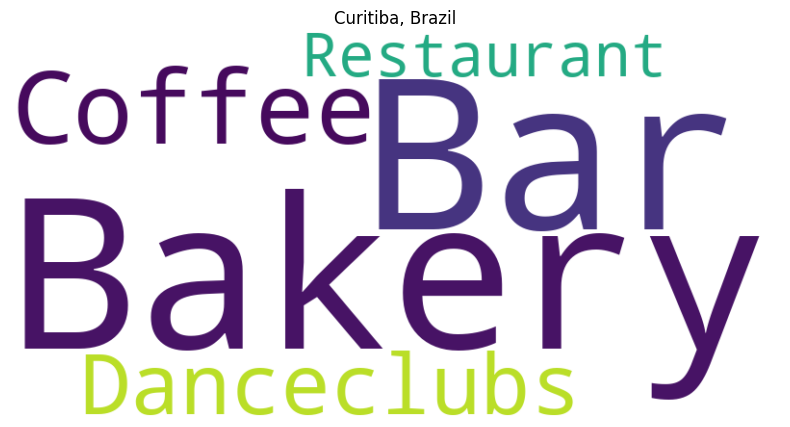

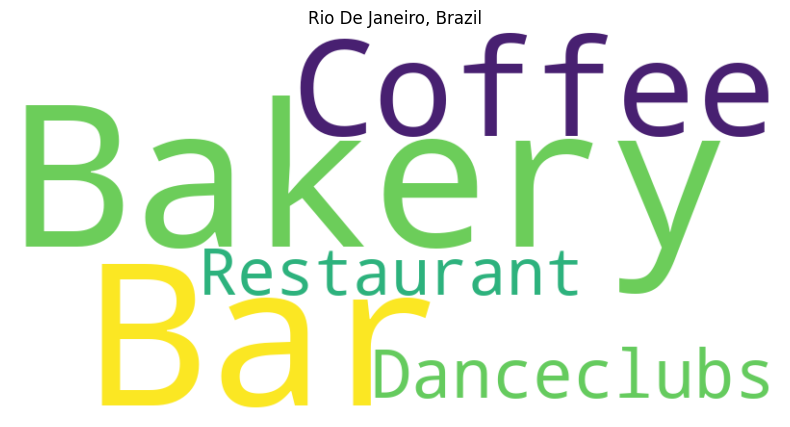

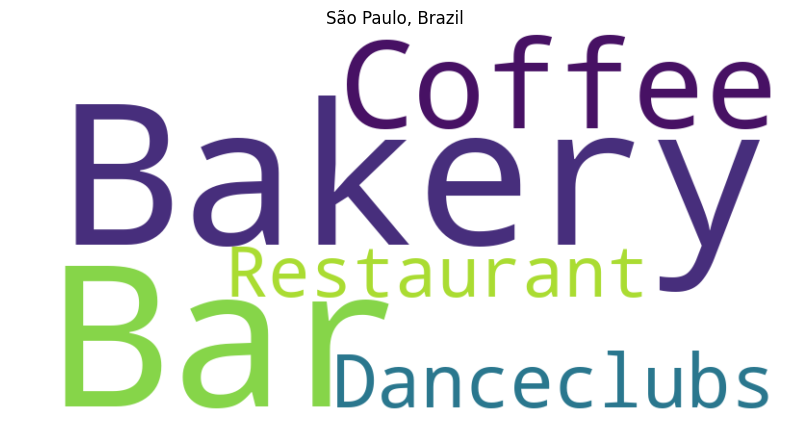

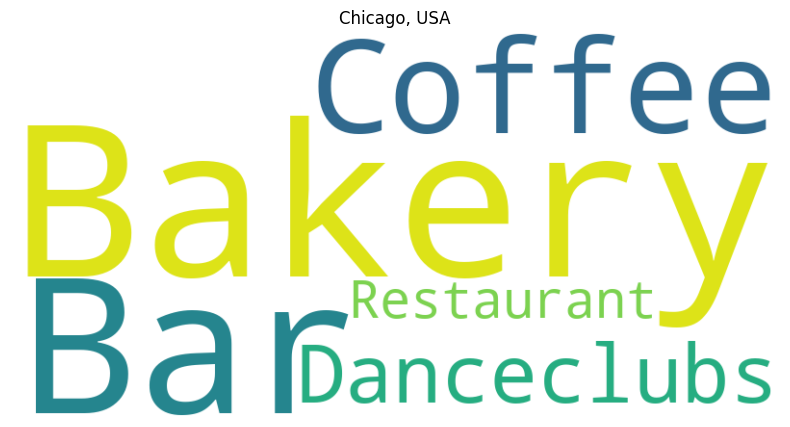

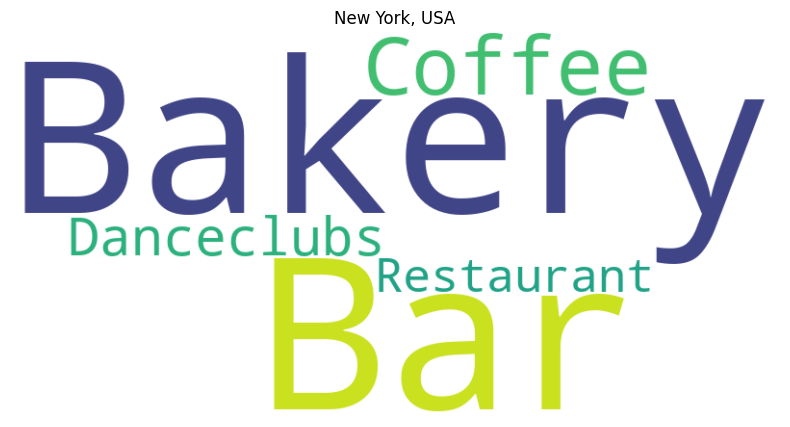

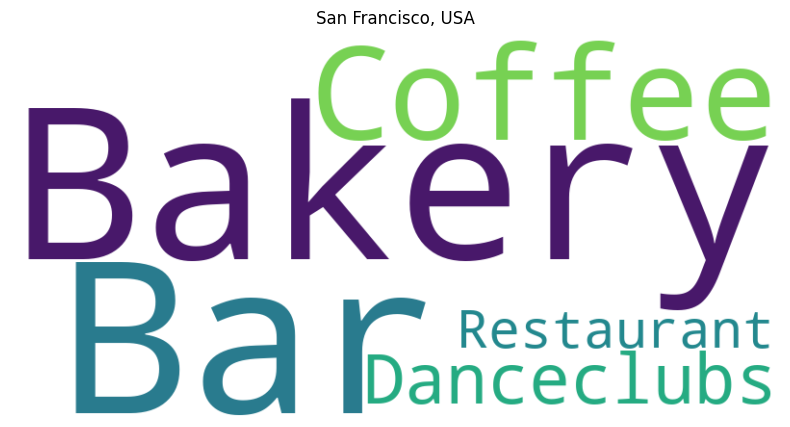

In [47]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv', index_col=0)

# Mapear os valores de país, cidade e categoria
country_map = {0: 'Brazil', 1: 'USA'}
city_map = {
    (0, 0): 'Curitiba',
    (0, 1): 'Rio De Janeiro',
    (0, 2): 'São Paulo',
    (1, 0): 'Chicago',
    (1, 2): 'New York',
    (1, 4): 'San Francisco'
}
category_map = {
    0: 'Bakery',
    1: 'Bar',
    2: 'Coffee',
    3: 'Danceclubs',
    4: 'Restaurant'
}

# Adicionar colunas mapeadas ao DataFrame
df['country_name'] = df['country'].map(country_map)
df['city_name'] = df.apply(lambda row: city_map.get((row['country'], row['city'])), axis=1)
df['category_name'] = df['category'].map(category_map)

# Remover duplicatas para garantir que cada categoria seja contada apenas uma vez por cidade
df_unique = df.drop_duplicates(subset=['country_name', 'city_name', 'category_name'])

# Agrupar as categorias por cidade e país
grouped = df_unique.groupby(['country_name', 'city_name'])['category_name'].apply(lambda x: ' '.join(x)).reset_index()

# Função para gerar a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Gerar a word cloud para cada cidade de cada país
for _, row in grouped.iterrows():
    country = row['country_name']
    city = row['city_name']
    categories = row['category_name']
    title = f'{city}, {country}'
    generate_word_cloud(categories, title)

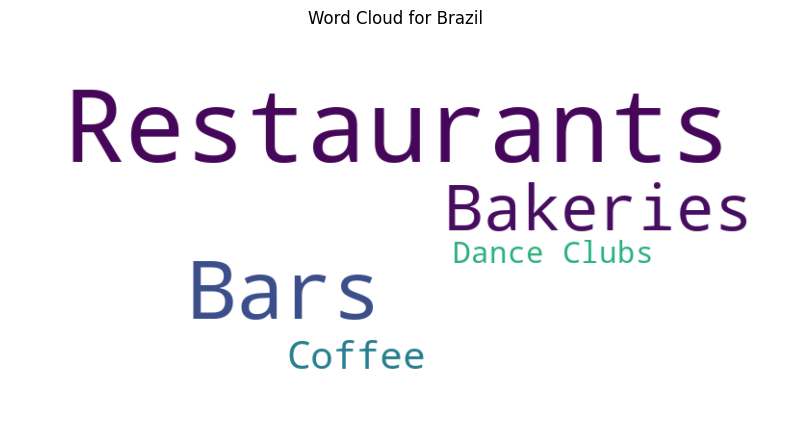

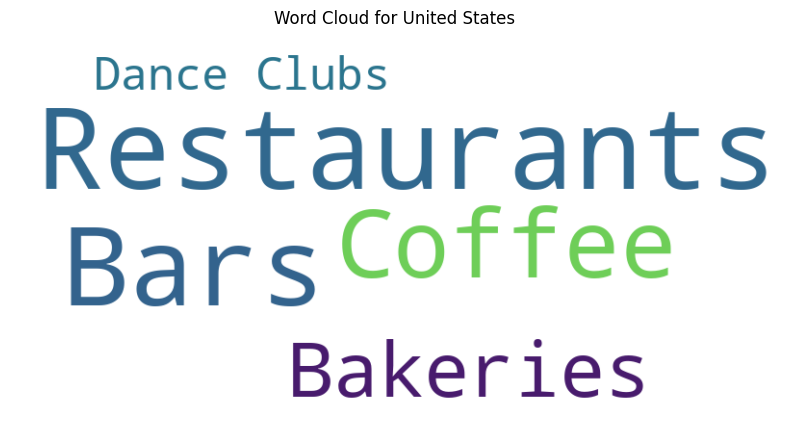

In [52]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dados extraídos da tabela LaTeX
data = {
    'Category': ['Bakeries', 'Bars', 'Coffee', 'Dance Clubs', 'Restaurants'],
    'Brazil': [752, 1290, 167, 93, 2184],
    'United States': [1091, 2462, 1812, 200, 2653]
}

# Criar um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Função para gerar a word cloud
def generate_word_cloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Gerar a word cloud para o Brasil
brazil_frequencies = dict(zip(df['Category'], df['Brazil']))
generate_word_cloud(brazil_frequencies, 'Word Cloud for Brazil')

# Gerar a word cloud para os Estados Unidos
us_frequencies = dict(zip(df['Category'], df['United States']))
generate_word_cloud(us_frequencies, 'Word Cloud for United States')

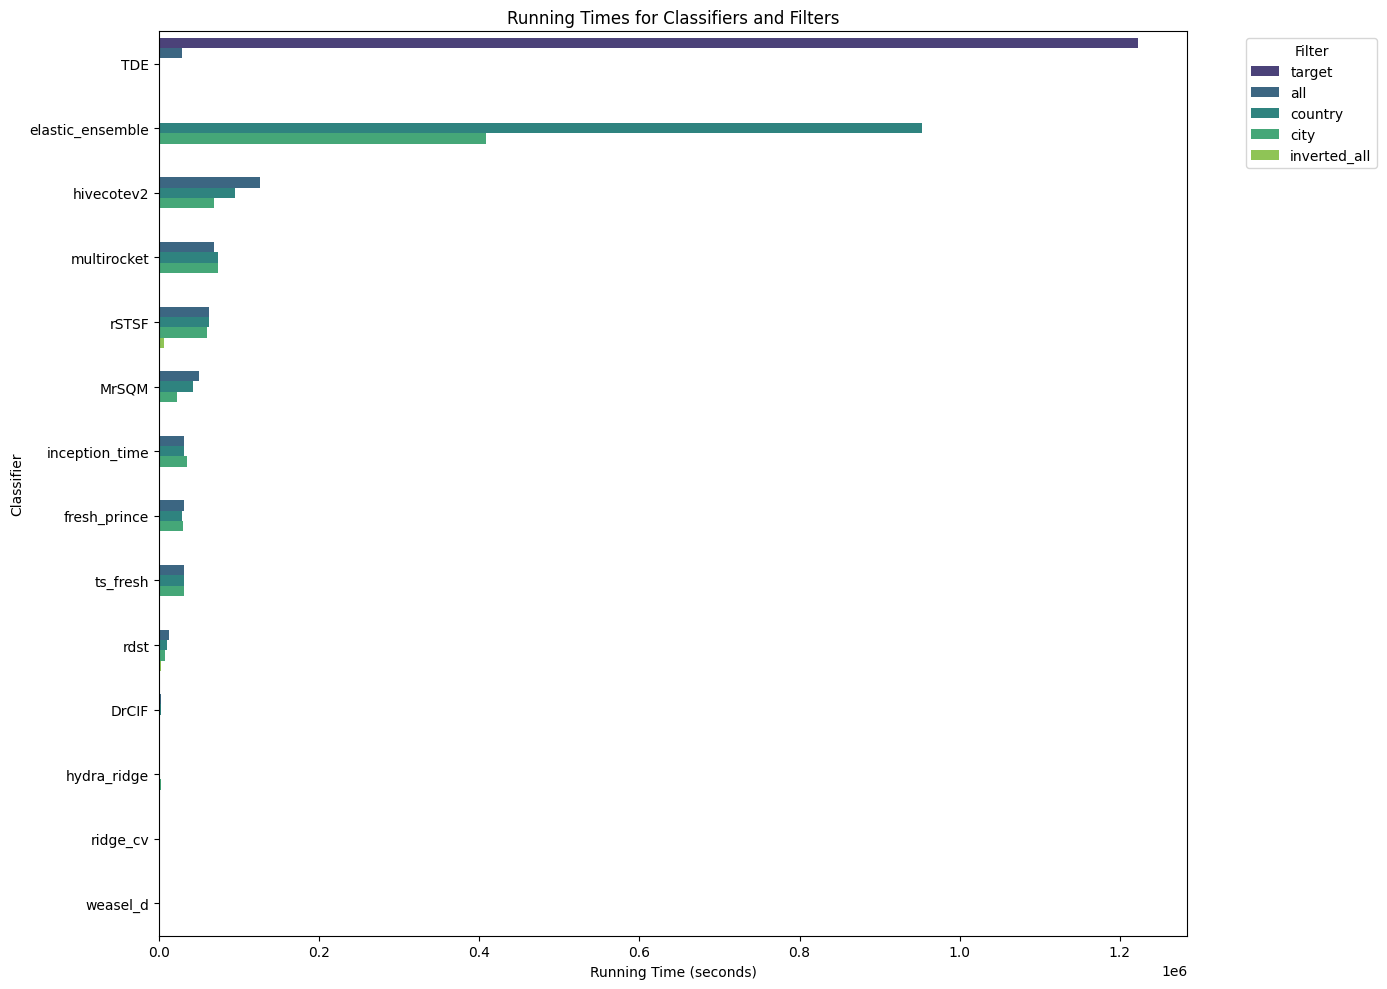

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Dados extraídos da tabela LaTeX
data = {
    'Classifier': ['TDE', 'TDE', 'elastic_ensemble', 'elastic_ensemble', 'hivecotev2', 'hivecotev2', 'multirocket', 'multirocket', 'multirocket', 'hivecotev2', 'rSTSF', 'rSTSF', 'rSTSF', 'MrSQM', 'MrSQM', 'inception_time', 'fresh_prince', 'ts_fresh', 'ts_fresh', 'inception_time', 'ts_fresh', 'inception_time', 'fresh_prince', 'fresh_prince', 'MrSQM', 'rdst', 'rdst', 'rdst', 'rSTSF', 'rdst', 'DrCIF', 'hydra_ridge', 'DrCIF', 'DrCIF', 'ridge_cv', 'hydra_ridge', 'weasel_d', 'ridge_cv', 'rdst', 'hydra_ridge', 'weasel_d', 'ridge_cv', 'hydra_ridge', 'weasel_d', 'hydra_ridge'],
    'Filter': ['target', 'all', 'country', 'city', 'all', 'country', 'city', 'country', 'all', 'city', 'all', 'country', 'city', 'all', 'country', 'city', 'all', 'country', 'all', 'country', 'city', 'all', 'city', 'country', 'city', 'all', 'country', 'city', 'inverted_all', 'inverted_all', 'all', 'city', 'country', 'city', 'city', 'country', 'all', 'country', 'target', 'all', 'country', 'all', 'inverted_all', 'city', 'target'],
    'Running Time': ['14 days, 3:48:54.964', '13 Days 07:55:22.298', '11 days 00:38:50.543', '4 days 17:21:55.959', '1 day 11:10:13.307', '1 day 02:29:36.924', '20:28:26.703', '20:27:35.760', '19:11:33.422', '19:02:19.624', '17:17:00.056', '17:10:53.382', '16:42:31.802', '13:54:19.091', '11:44:02.075', '9:32:49.015', '8:38:34.519', '8:33:43.781', '8:30:10.135', '8:49:14.094', '8:37:40.930', '8:34:19.778', '8:18:27.254', '8:08:04.246', '6:19:55.141', '3:33:53.686', '2:36:26.380', '1:55:09.165', '1:53:40.056', '0:36:05.830', '0:33:28.662', '0:32:49.738', '0:31:57.594', '0:30:19.343', '0:29:51.667', '0:28:05.461', '0:28:00.548', '0:27:16.919', '0:26:32.958', '0:18:43.621', '0:18:05.071', '0:15:30.205', '0:05:56.080', '0:05:52.877', '0:01:26.594']
}

# Criar um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Função para converter tempo de execução para segundos
def convert_to_seconds(time_str):
    days = hours = minutes = seconds = 0
    if 'day' in time_str:
        days_match = re.search(r'(\d+)\s*day', time_str)
        if days_match:
            days = int(days_match.group(1))
    if 'days' in time_str:
        days_match = re.search(r'(\d+)\s*days', time_str)
        if days_match:
            days = int(days_match.group(1))
    time_match = re.search(r'(\d+):(\d+):([\d.]+)', time_str)
    if time_match:
        hours = int(time_match.group(1))
        minutes = int(time_match.group(2))
        seconds = float(time_match.group(3))
    return days * 86400 + hours * 3600 + minutes * 60 + seconds

# Converter a coluna 'Running Time' para segundos
df['Running Time (s)'] = df['Running Time'].apply(convert_to_seconds)

# Criar o gráfico
plt.figure(figsize=(14, 10))
sns.barplot(x='Running Time (s)', y='Classifier', hue='Filter', data=df, palette='viridis')
plt.title('Running Times for Classifiers and Filters')
plt.xlabel('Running Time (seconds)')
plt.ylabel('Classifier')
plt.legend(title='Filter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

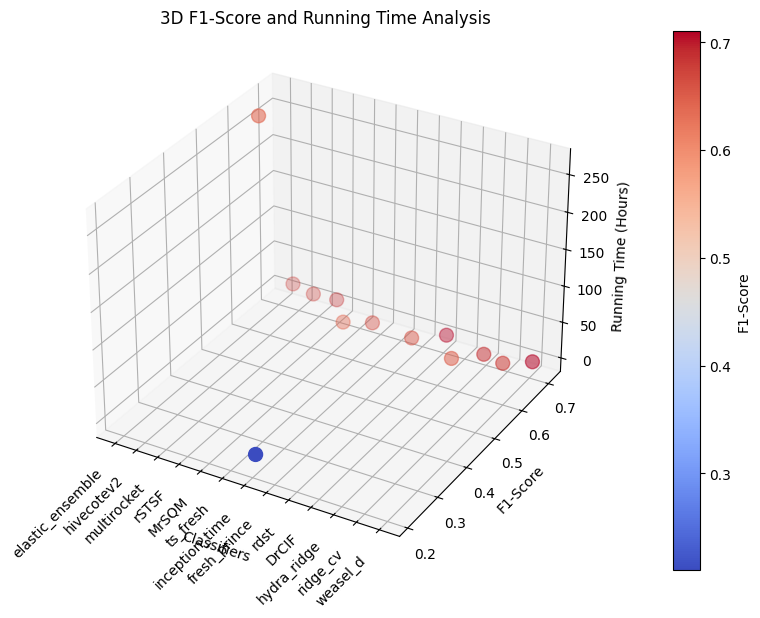

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Classifiers
classifiers = [
    "elastic_ensemble", "hivecotev2", "multirocket", "rSTSF", "MrSQM", "ts_fresh", "inception_time",
    "fresh_prince", "rdst", "DrCIF", "hydra_ridge", "ridge_cv", "weasel_d"
]

# Convert Running Time to Hours
running_times = [
    11 * 24 + 0 + 38/60,  # 11 days 00:38:50.543
    1 * 24 + 2 + 29/60,   # 1 day 02:29:36.924
    20 + 27/60,           # 20:27:35.760
    17 + 10/60,           # 17:10:53.382
    11 + 44/60,           # 11:44:02.075
    8 + 33/60,            # 8:33:43.781
    8 + 49/60,            # 8:49:14.094
    8 + 8/60,             # 8:08:04.246
    2 + 36/60,            # 2:36:26.380
    0 + 31/60,            # 0:31:57.594
    0 + 28/60,            # 0:28:05.461
    0 + 27/60,            # 0:27:16.919
    0 + 18/60             # 0:18:05.071
]

# F1-Score values (used for color mapping)
f1_score = [
    0.64, 0.68, 0.68, 0.69, 0.64, 0.67, 0.21,
    0.66, 0.71, 0.65, 0.69, 0.68, 0.71
]

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Convert Classifiers to Numeric Indices for X-Axis
x_pos = np.arange(len(classifiers))

# Scatter plot with color based on F1-Score
sc = ax.scatter(x_pos, f1_score, running_times, c=f1_score, cmap="coolwarm", s=100)

# Labels
ax.set_xlabel("Classifiers", labelpad=10)
ax.set_ylabel("F1-Score")
ax.set_zlabel("Running Time (Hours)")
ax.set_title("3D F1-Score and Running Time Analysis")

# Rotate X-axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(classifiers, rotation=45, ha="right")

# Add Color Bar for F1-Score
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("F1-Score")

# Show Plot
plt.show()


In [13]:
df_tsfel = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')
df_tsfel

id       h01  h02  h03  h04  h05       h06       h07       h08  \
0          0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
1          1  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
2          2  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
3          3  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247   
4          4  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893   
...      ...       ...  ...  ...  ...  ...       ...       ...       ...   
12699  12699  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12700  12700  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12701  12701  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12702  12702  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12703  12703  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

            h09  ...  0_Wavelet variance_12.5Hz  0_Wavelet variance_2.78Hz  \
0      0.009199  ...                   0.135013                   0.350354   
1      0.000000  ...                   0.047258                   0.210755   
2      0.000000  ...                   0.200353                   0.359506   
3      0.688605  ...                   0.130506                   0.650331   
4      0.211369  ...                   0.146770                   0.645115   
...         ...  ...                        ...                        ...   
12699  0.000000  ...                   0.127471                   0.583408   
12700  0.000000  ...                   0.181369                   0.332863   
12701  0.000000  ...                   0.037427                   0.177333   
12702  0.000000  ...                   0.169666                   0.590733   
12703  0.000000  ...                   0.092945                   0.350640   

       0_Wavelet variance_25.0Hz  0_Wavelet variance_3.12Hz  \
0                       0.055348                   0.374657   
1                       0.017510                   0.243652   
2                       0.026226                   0.414783   
3                       0.025610                   0.712485   
4                       0.021830                   0.680435   
...                          ...                        ...   
12699                   0.038333                   0.617643   
12700                   0.055123                   0.347610   
12701                   0.014086                   0.199679   
12702                   0.022402                   0.654275   
12703                   0.042998                   0.375226   

       0_Wavelet variance_3.57Hz  0_Wavelet variance_4.17Hz  \
0                       0.371827                   0.332009   
1                       0.266225                   0.270016   
2                       0.455802                   0.476505   
3                       0.720895                   0.651301   
4                       0.665672                   0.590342   
...                          ...                        ...   
12699                   0.609788                   0.548983   
12700                   0.339244                   0.305477   
12701                   0.212288                   0.210719   
12702                   0.710453                   0.749736   
12703                   0.374869                   0.342379   

       0_Wavelet variance_5.0Hz  0_Wavelet variance_6.25Hz  \
0                      0.256005                   0.158831   
1                      0.247738                   0.195541   
2                      0.474555                   0.451034   
3                      0.501350                   0.317766   
4                      0.464516                   0.323574   
...                         ...                        ...   
12699                  0.436816                   0.289192   
12700                  0.250778                   0.188896   
12701                  0.192462                   0.156509   
12702                  0.7

In [14]:
has_nan = df_tsfel.isnull().values.any()

if has_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


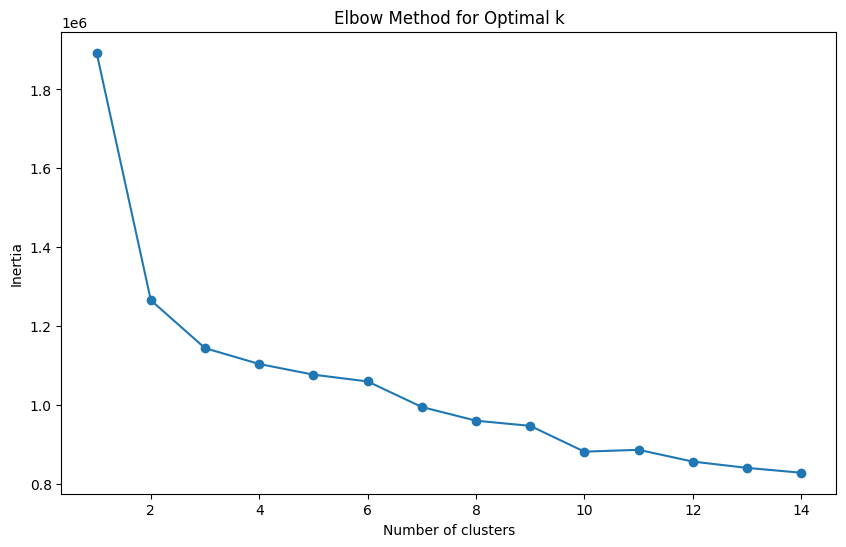

   id  kmeans_cluster
0   0               2
1   1               2
2   2               3
3   3               0
4   4               0


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')

feature_columns = data.columns.difference(['id'])
features = data[feature_columns]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k = 5 

kmeans = KMeans(n_clusters=k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(features_scaled)

inertia = []
k_range = range(1, 15)
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

data.to_csv('clustered_dataset.csv', index=False)
print(data[['id', 'kmeans_cluster']].head())


In [16]:
df_clustered = pd.read_csv('clustered_dataset.csv')
df_clustered

id       h01  h02  h03  h04  h05       h06       h07       h08  \
0          0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
1          1  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
2          2  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
3          3  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247   
4          4  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893   
...      ...       ...  ...  ...  ...  ...       ...       ...       ...   
12699  12699  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12700  12700  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12701  12701  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12702  12702  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12703  12703  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

            h09  ...  0_Wavelet variance_2.78Hz  0_Wavelet variance_25.0Hz  \
0      0.009199  ...                   0.350354                   0.055348   
1      0.000000  ...                   0.210755                   0.017510   
2      0.000000  ...                   0.359506                   0.026226   
3      0.688605  ...                   0.650331                   0.025610   
4      0.211369  ...                   0.645115                   0.021830   
...         ...  ...                        ...                        ...   
12699  0.000000  ...                   0.583408                   0.038333   
12700  0.000000  ...                   0.332863                   0.055123   
12701  0.000000  ...                   0.177333                   0.014086   
12702  0.000000  ...                   0.590733                   0.022402   
12703  0.000000  ...                   0.350640                   0.042998   

       0_Wavelet variance_3.12Hz  0_Wavelet variance_3.57Hz  \
0                       0.374657                   0.371827   
1                       0.243652                   0.266225   
2                       0.414783                   0.455802   
3                       0.712485                   0.720895   
4                       0.680435                   0.665672   
...                          ...                        ...   
12699                   0.617643                   0.609788   
12700                   0.347610                   0.339244   
12701                   0.199679                   0.212288   
12702                   0.654275                   0.710453   
12703                   0.375226                   0.374869   

       0_Wavelet variance_4.17Hz  0_Wavelet variance_5.0Hz  \
0                       0.332009                  0.256005   
1                       0.270016                  0.247738   
2                       0.476505                  0.474555   
3                       0.651301                  0.501350   
4                       0.590342                  0.464516   
...                          ...                       ...   
12699                   0.548983                  0.436816   
12700                   0.305477                  0.250778   
12701                   0.210719                  0.192462   
12702                   0.749736                  0.726257   
12703                   0.342379                  0.277622   

       0_Wavelet variance_6.25Hz  0_Wavelet variance_8.33Hz  \
0                       0.158831                   0.099508   
1                       0.195541                   0.118002   
2                       0.451034                   0.374289   
3                       0.317766                   0.198137   
4                       0.323574                   0.225143   
...                          ...                        ...   
12699                   0.289192                   0.163131   
12700                   0.188896                   0.160689   
12701                   0.156509                   0.099992   
12702                   0.60

mesmo código acima, mas com geração de arquivo csv pra cada K.

Saved clustering result for k=1 to df_timeseries_with_kmeans_k1_clusters.csv
inertia_values is: [1892895.9999999995]
Saved clustering result for k=2 to df_timeseries_with_kmeans_k2_clusters.csv
inertia_values is: [1892895.9999999995, 1266187.8529122155]
Saved clustering result for k=3 to df_timeseries_with_kmeans_k3_clusters.csv
inertia_values is: [1892895.9999999995, 1266187.8529122155, 1144779.8374153983]
Saved clustering result for k=4 to df_timeseries_with_kmeans_k4_clusters.csv
inertia_values is: [1892895.9999999995, 1266187.8529122155, 1144779.8374153983, 1104617.888791746]
Saved clustering result for k=5 to df_timeseries_with_kmeans_k5_clusters.csv
inertia_values is: [1892895.9999999995, 1266187.8529122155, 1144779.8374153983, 1104617.888791746, 1077630.4662025478]
Saved clustering result for k=6 to df_timeseries_with_kmeans_k6_clusters.csv
inertia_values is: [1892895.9999999995, 1266187.8529122155, 1144779.8374153983, 1104617.888791746, 1077630.4662025478, 1060474.6709499387]
S

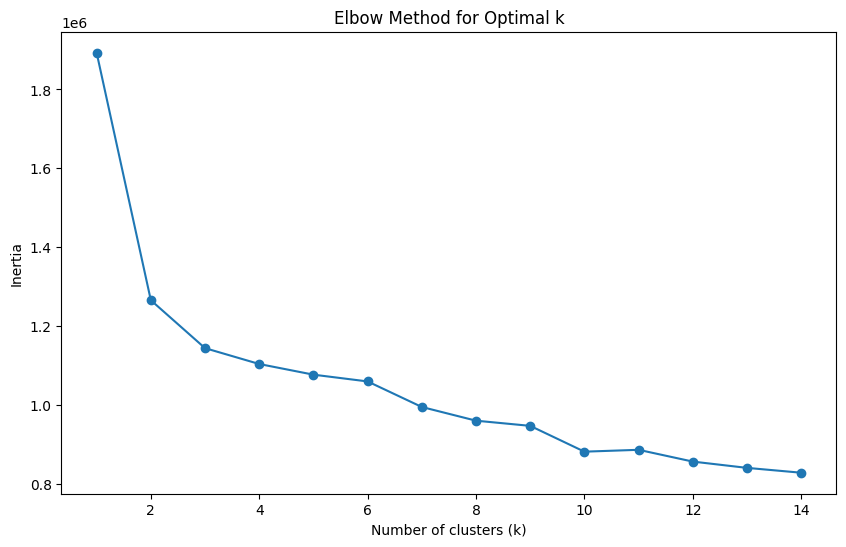

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')
feature_columns = data.columns.difference(['id'])
features = data[feature_columns]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
k_range = range(1, 15)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    data[f'kmeans_cluster_k{k}'] = kmeans.fit_predict(features_scaled)
    
    inertia_values.append(kmeans.inertia_)
    
    output_file = f'df_timeseries_with_kmeans_k{k}_clusters.csv'
    data[['id', f'kmeans_cluster_k{k}']].to_csv(output_file, index=False)
    print(f'Saved clustering result for k={k} to {output_file}')
    print('inertia_values is:', inertia_values)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


# T-SNE

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


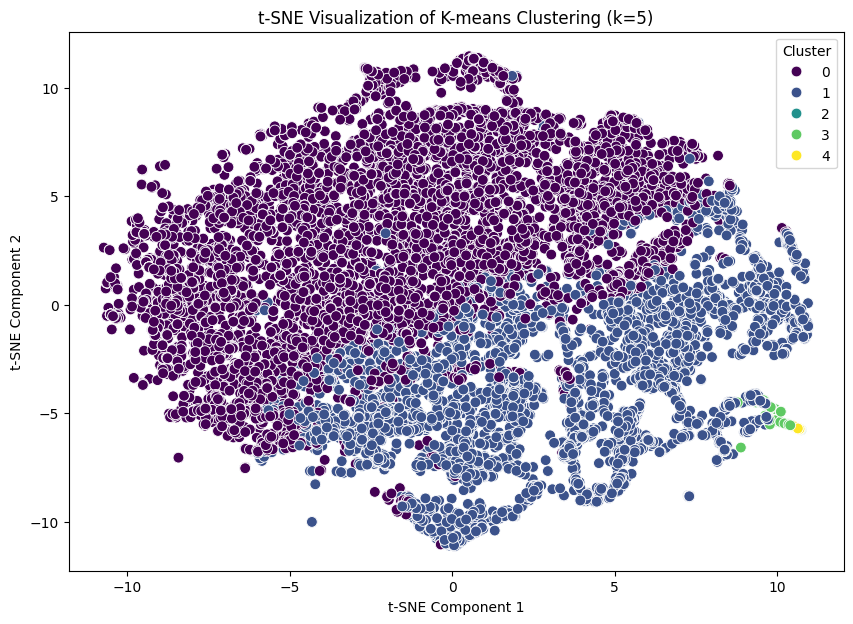

In [104]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')

feature_columns = data.columns.difference(['id'])
features = data[feature_columns]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k = 5 

kmeans = KMeans(n_clusters=k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(features_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
features_tsne = tsne.fit_transform(features_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=data['kmeans_cluster'], palette='viridis', s=60)
plt.title(f't-SNE Visualization of K-means Clustering (k={k})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  probably much faster than the default batch implementation.
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  probably much faster than the default batch implementation.
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  probably much faster than the default batch implementation.
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_k

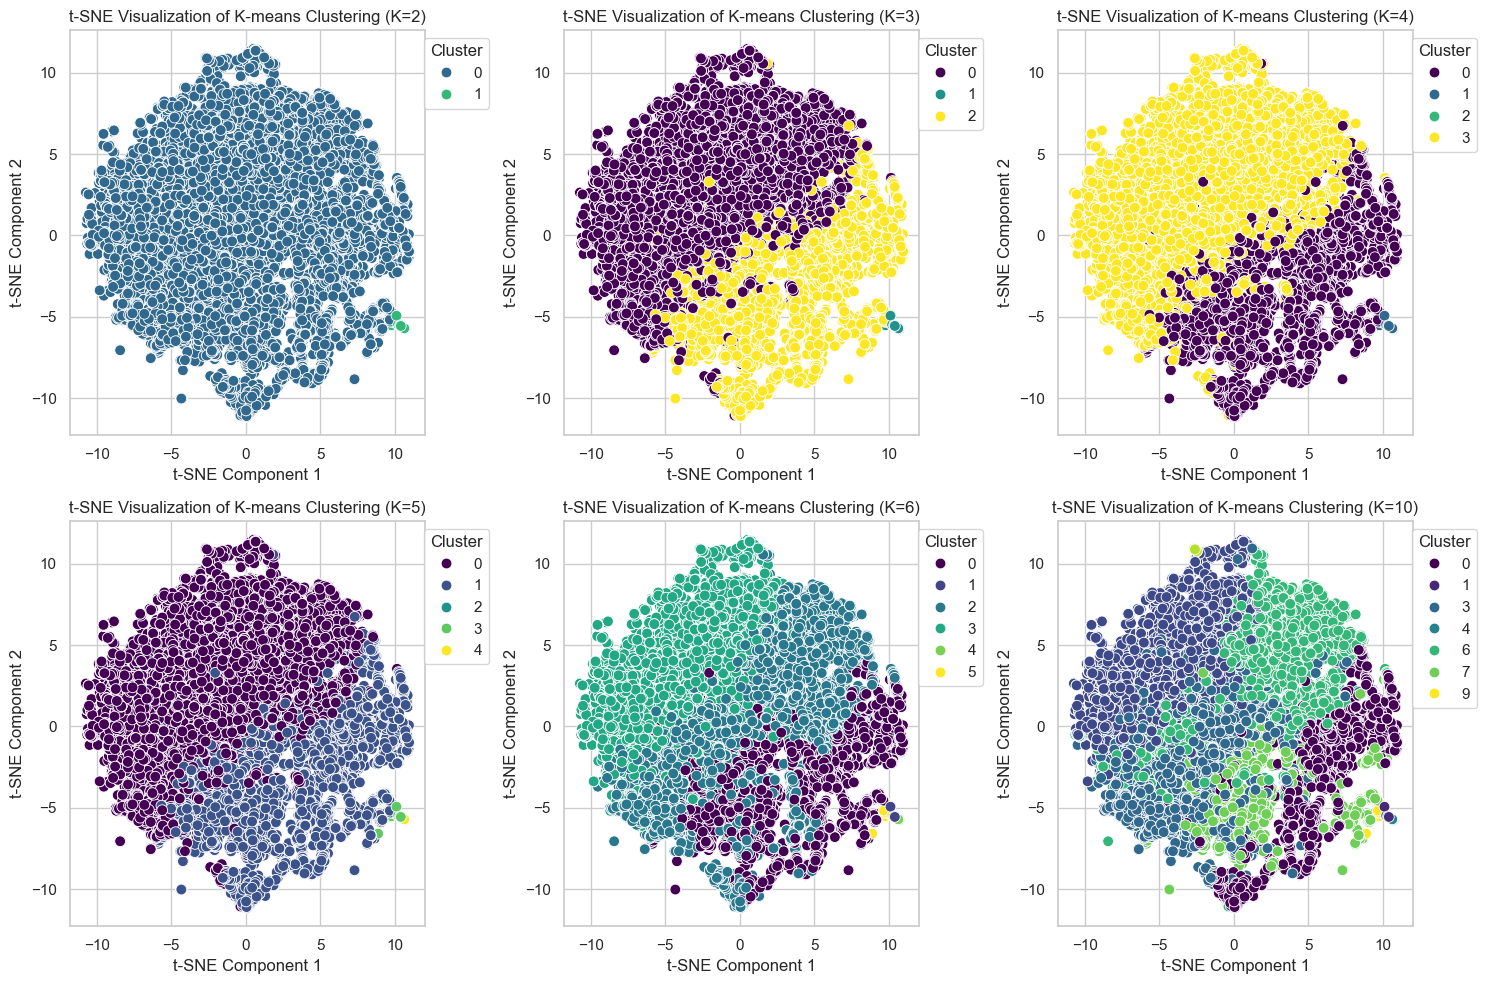

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

data = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')

feature_columns = data.columns.difference(['id'])
features = data[feature_columns]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
features_tsne = tsne.fit_transform(features_scaled)

k_values = [2, 3, 4, 5, 6, 10] 

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

for i, k in enumerate(k_values, start=1):

    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    

    plt.subplot(2, 3, i) 
    sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], 
                    hue=cluster_labels, palette='viridis', s=60)
    plt.title(f't-SNE Visualization of K-means Clustering (K={k})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


In [5]:
data = pd.read_csv('/Users/carolina/Desktop/Mestrado/combined_entries_all_files.csv')
data

filename            Classifier filter_ds  \
0            results_rSTSF_country.csv                 rSTSF        _0   
1            results_rSTSF_country.csv                 rSTSF        _1   
2             results_rdst_country.csv                  rdst        _0   
3             results_rdst_country.csv                  rdst        _1   
4    results_hivecotev2_v2_country.csv            hivecotev2        _0   
..                                 ...                   ...       ...   
144           best_of_m1_m2_models.csv  best_of_m1_m2_models      _0_1   
145           best_of_m1_m2_models.csv  best_of_m1_m2_models      _0_2   
146           best_of_m1_m2_models.csv  best_of_m1_m2_models      _1_0   
147           best_of_m1_m2_models.csv  best_of_m1_m2_models      _1_2   
148           best_of_m1_m2_models.csv  best_of_m1_m2_models      _1_4   

     accuracy_score_mean  f1_score_mean  precision_score_mean  \
0               0.727593       0.722834              0.722897   
1               0.654417       0.652939              0.654324   
2               0.732499       0.723744              0.730521   
3               0.696153       0.692374              0.695250   
4               0.708199       0.700249              0.704696   
..                   ...            ...                   ...   
144             0.700000       0.690000              0.660000   
145             0.700000       0.690000              0.660000   
146             0.700000       0.690000              0.660000   
147             0.700000       0.690000              0.660000   
148             0.700000       0.690000              0.660000   

     recall_score_mean  accuracy_score_std  f1_score_std  precision_score_std  \
0             0.727593            0.020991      0.022464             0.022144   
1             0.654417            0.001859      0.001556             0.001690   
2             0.732499            0.015173      0.016480             0.014979   
3             0.696153            0.008973      0.009323             0.008434   
4             0.708199            0.018305      0.019852             0.019223   
..                 ...                 ...           ...                  ...   
144           0.760000            0.000000      0.000000             0.000000   
145           0.760000            0.000000      0.000000             0.000000   
146           0.760000            0.000000      0.000000             0.000000   
147           0.760000            0.000000      0.000000             0.000000   
148           0.760000            0.000000      0.000000             0.000000   

     recall_score_std  accuracy_score_ci_l  f1_score_ci_l  \
0            0.020991             0.669313       0.660463   
1            0.001859             0.649256       0.648619   
2            0.015173             0.690372       0.677988   
3            0.008973             0.671240       0.666489   
4            0.018305             0.657376       0.645132   
..                ...                  ...            ...   
144          0.000000             0.000000       0.000000   
145          0.000000             0.000000       0.000000   
146          0.000000             0.000000       0.000000   
147          0.000000             0.000000       0.000000   
148          0.000000             0.000000       0.000000   

     precision_score_ci_l  recall_score_ci_l  accuracy_score_ci_h  \
0                0.661417           0.669313             0.785873   
1                0.649632           0.649256             0.659579   
2                0.688932           0.690372             0.774626   
3                0.671833           0.671240             0.721067   
4                0.651323           0.657376             0.759022   
..                    ...                ...                  ...   
144              0.000000           0.000000             0.000000   
145              0.000000           0.000000             0.000000   
146              0.000000        

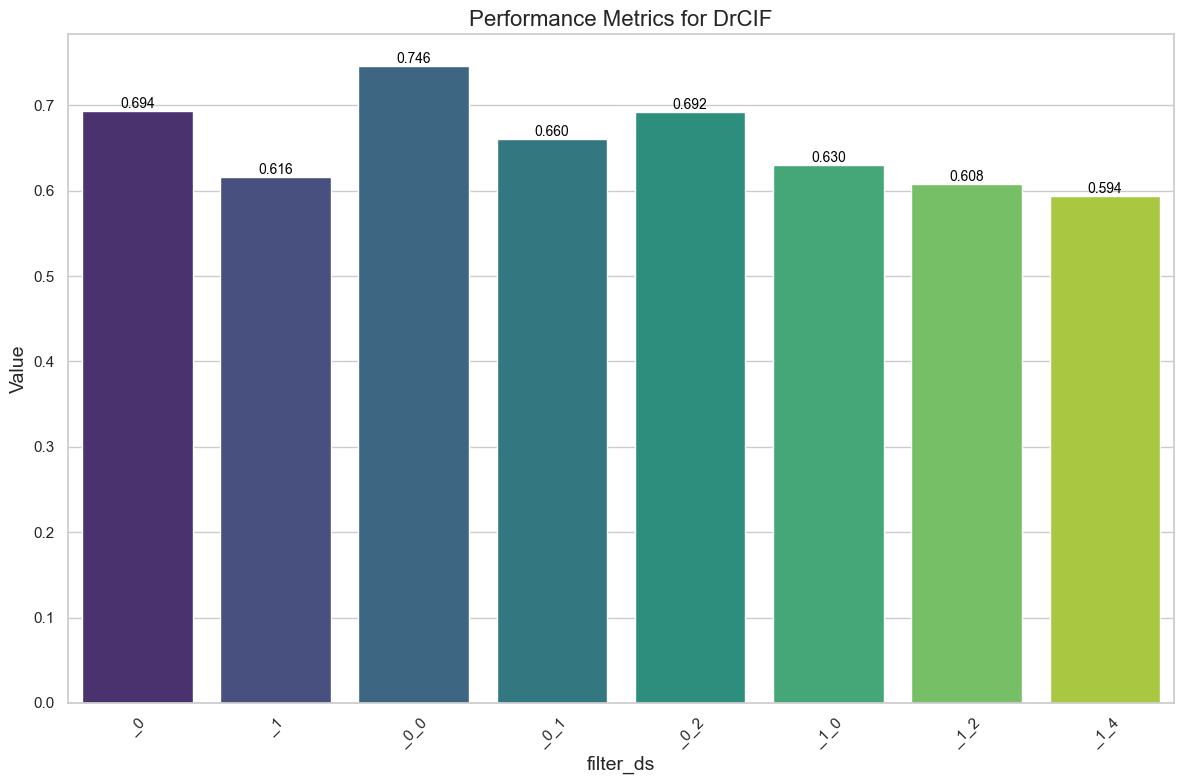

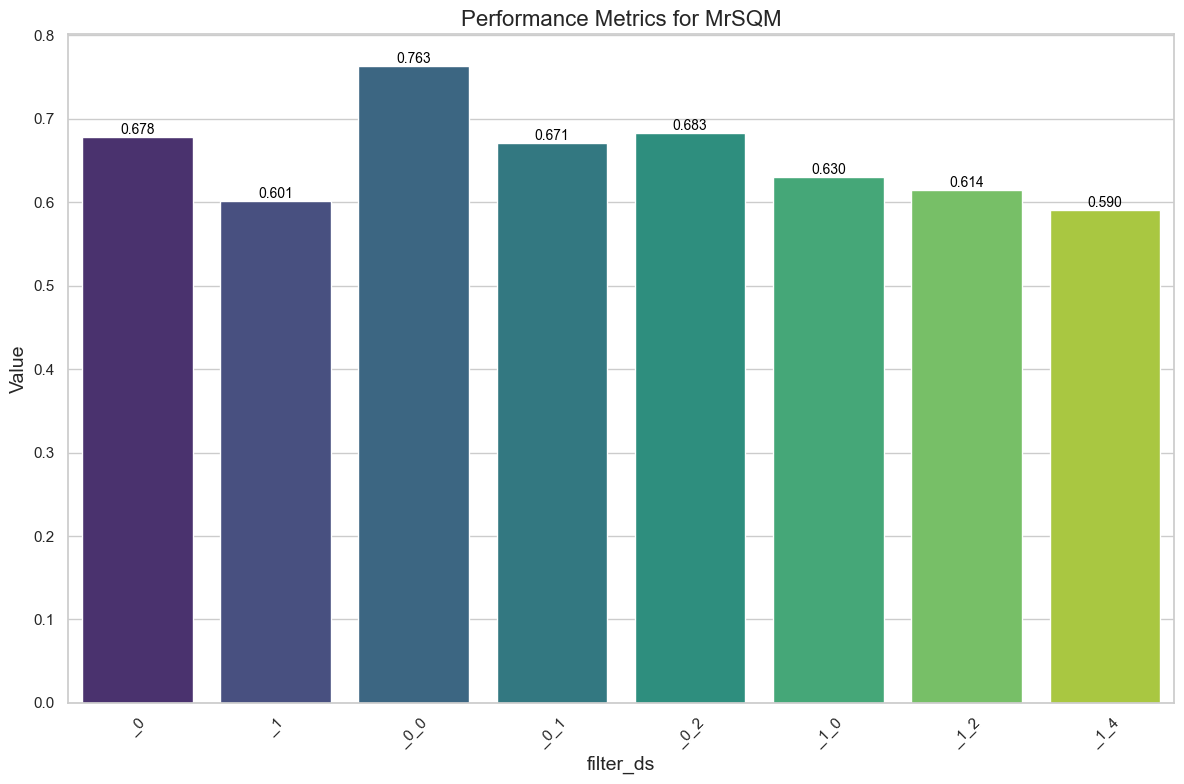

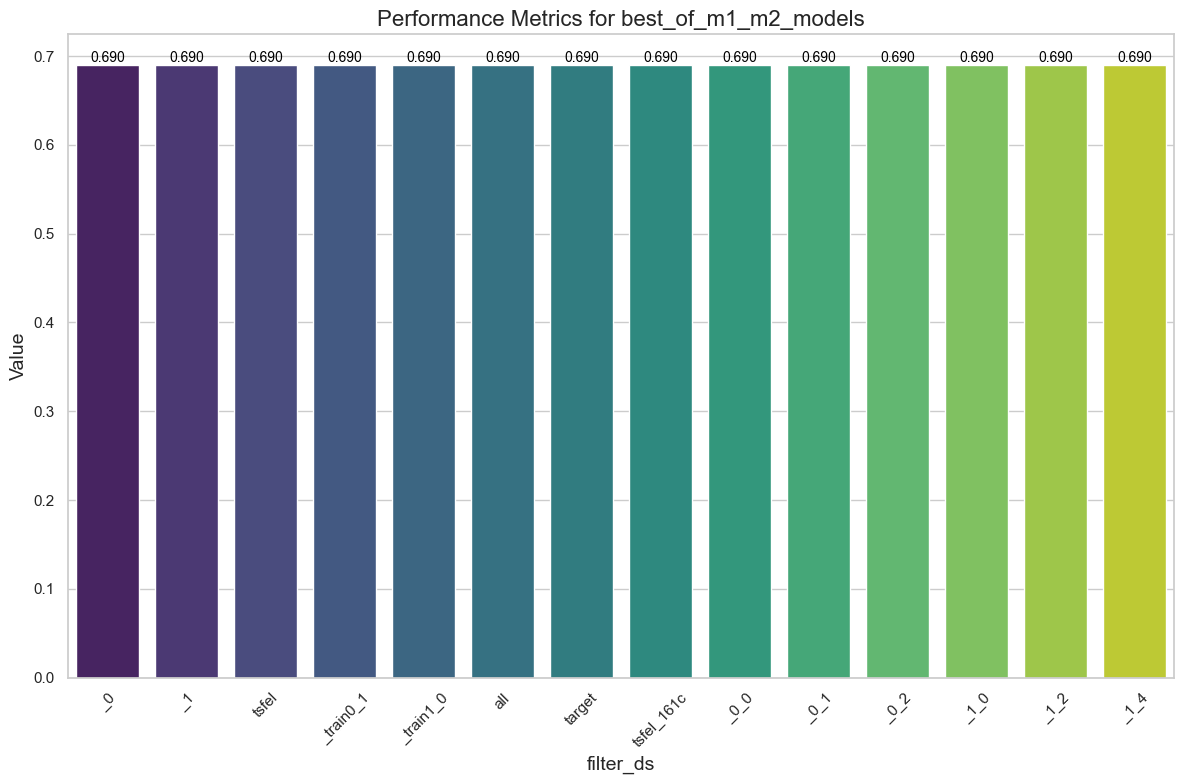

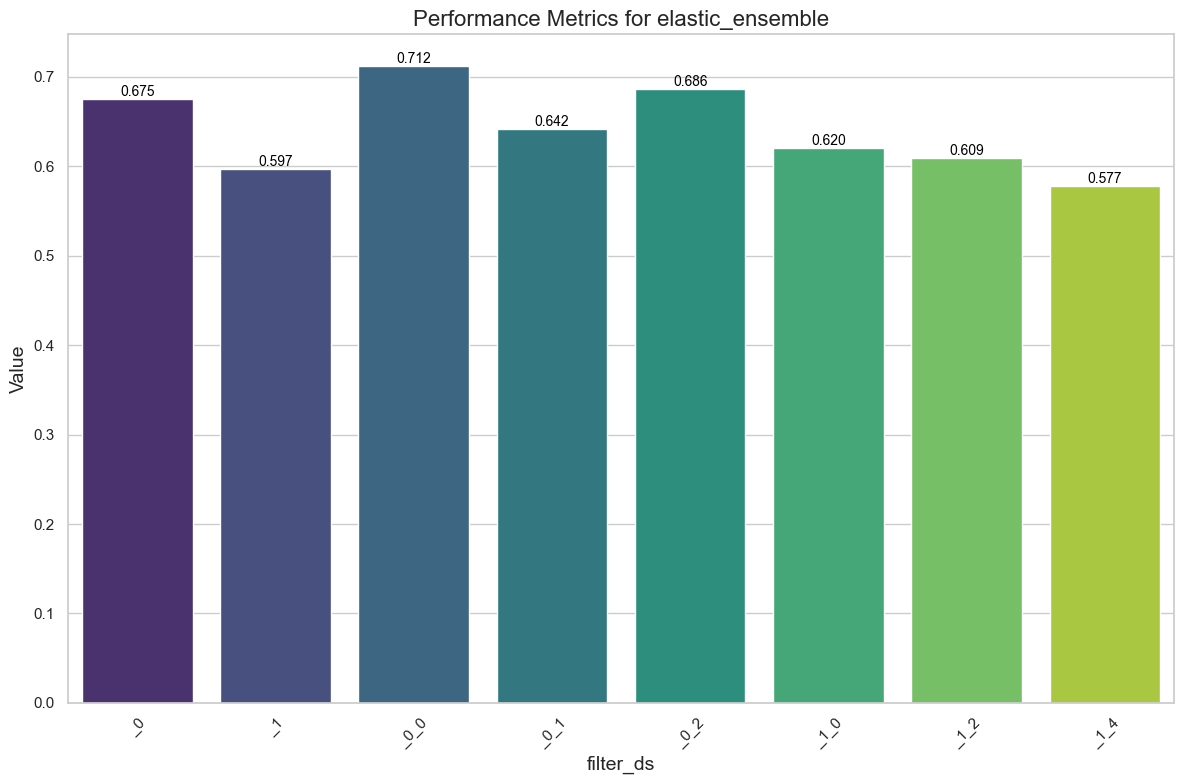

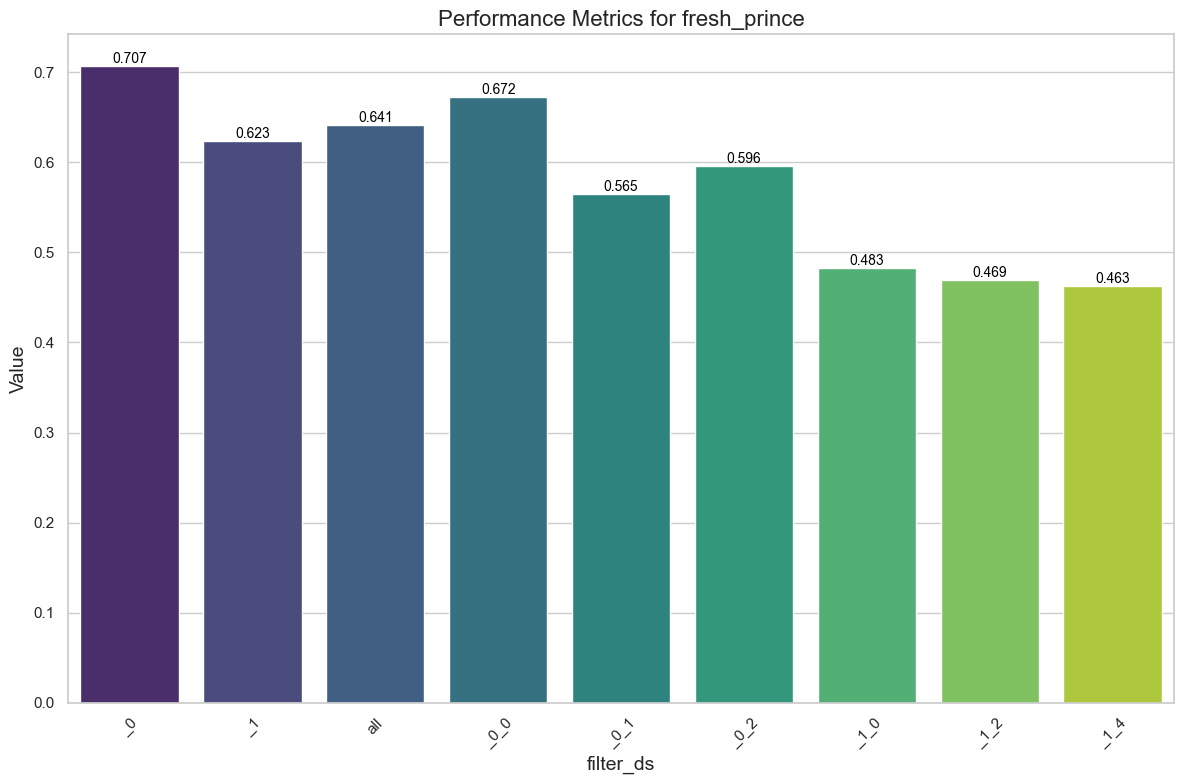

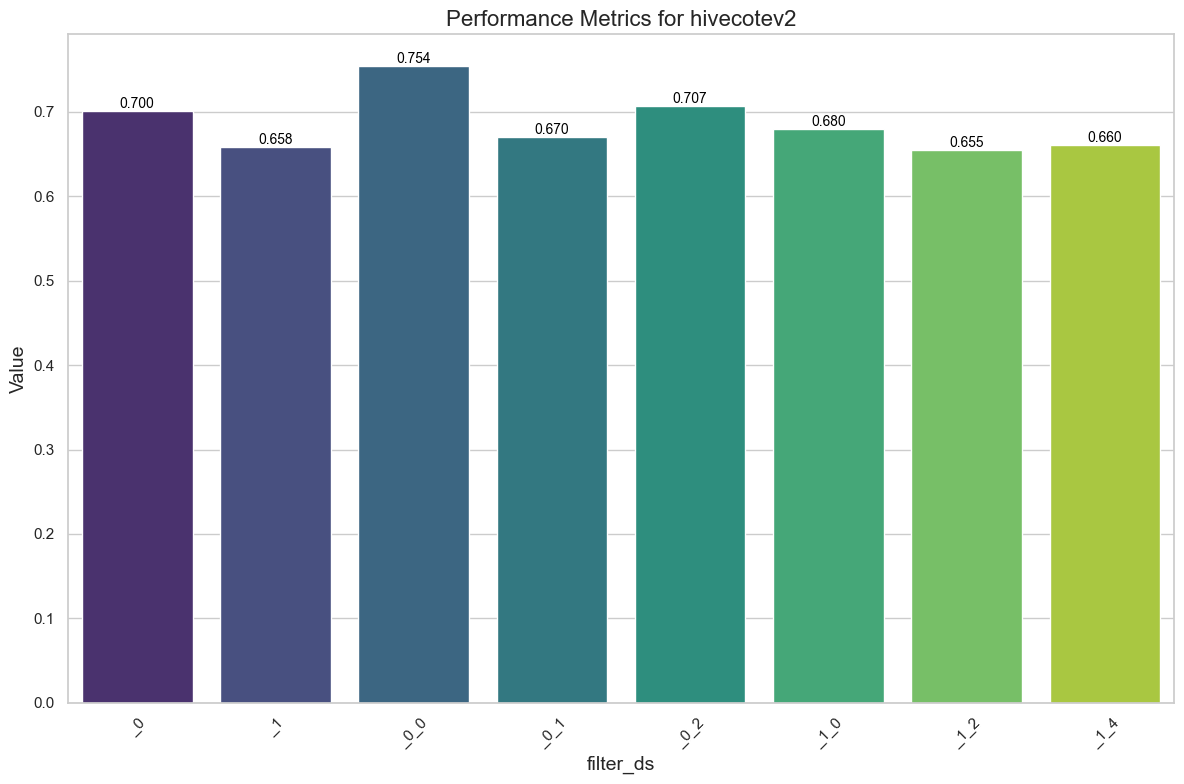

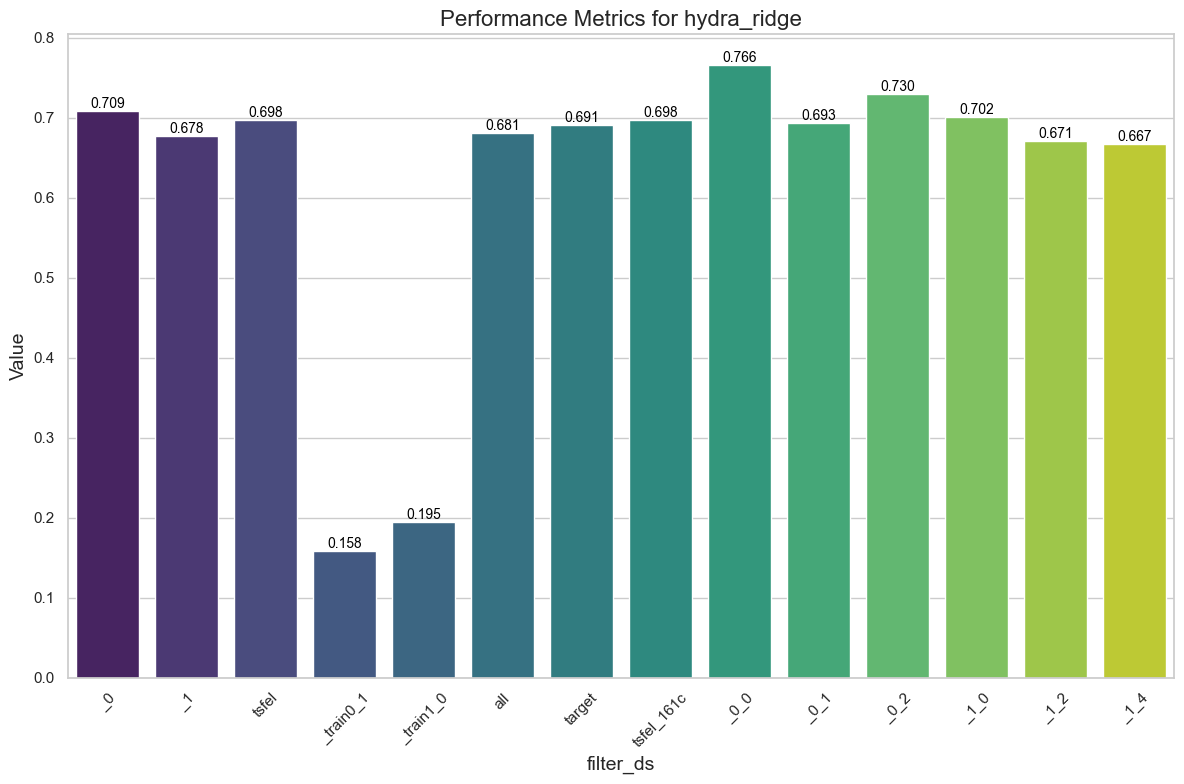

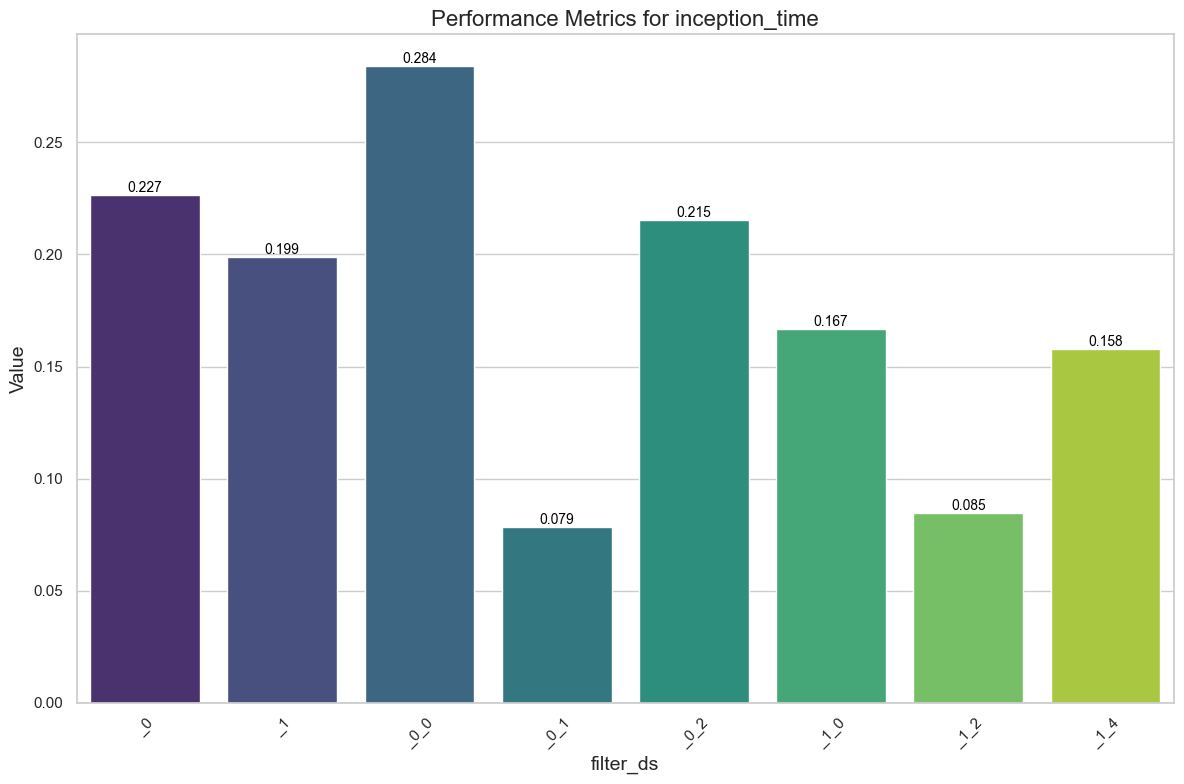

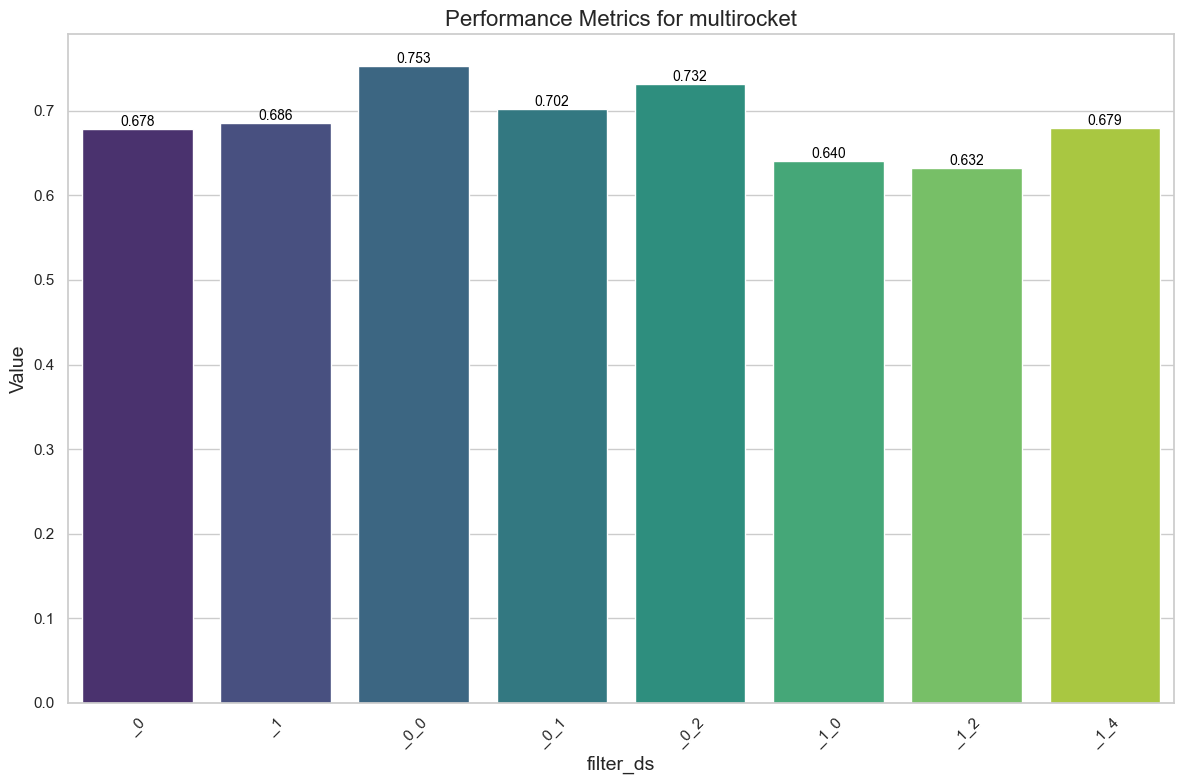

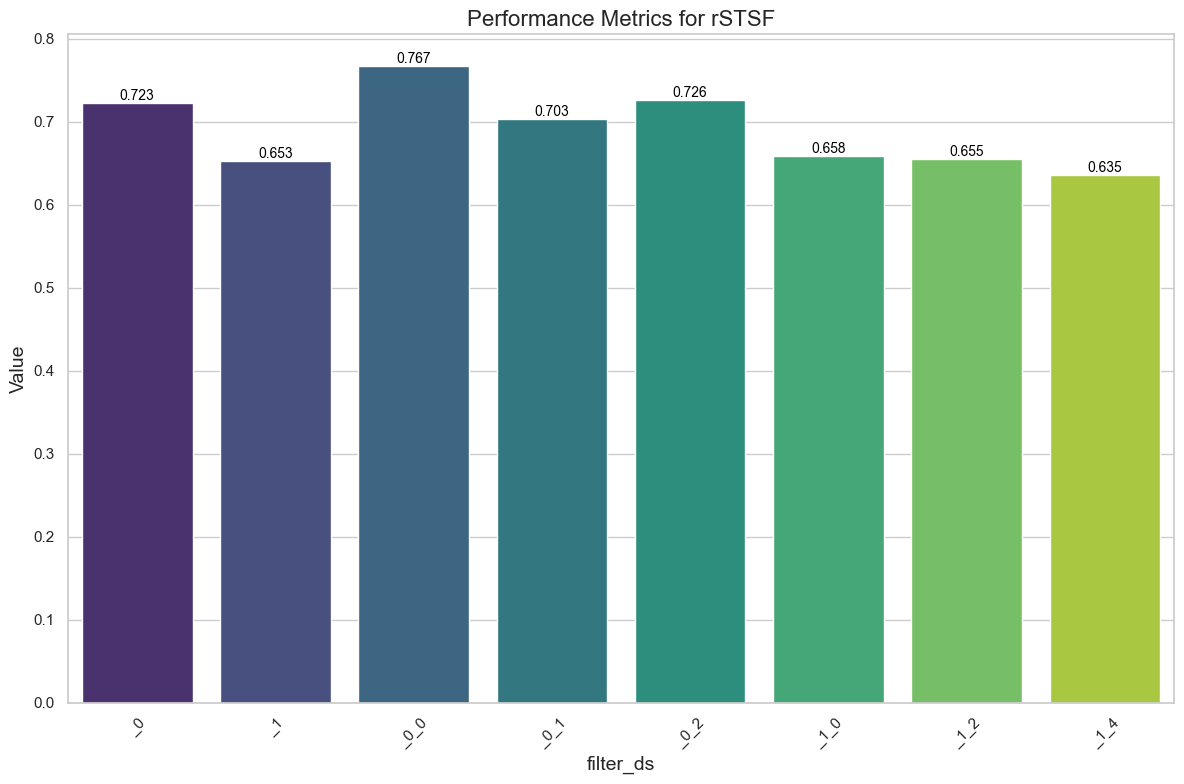

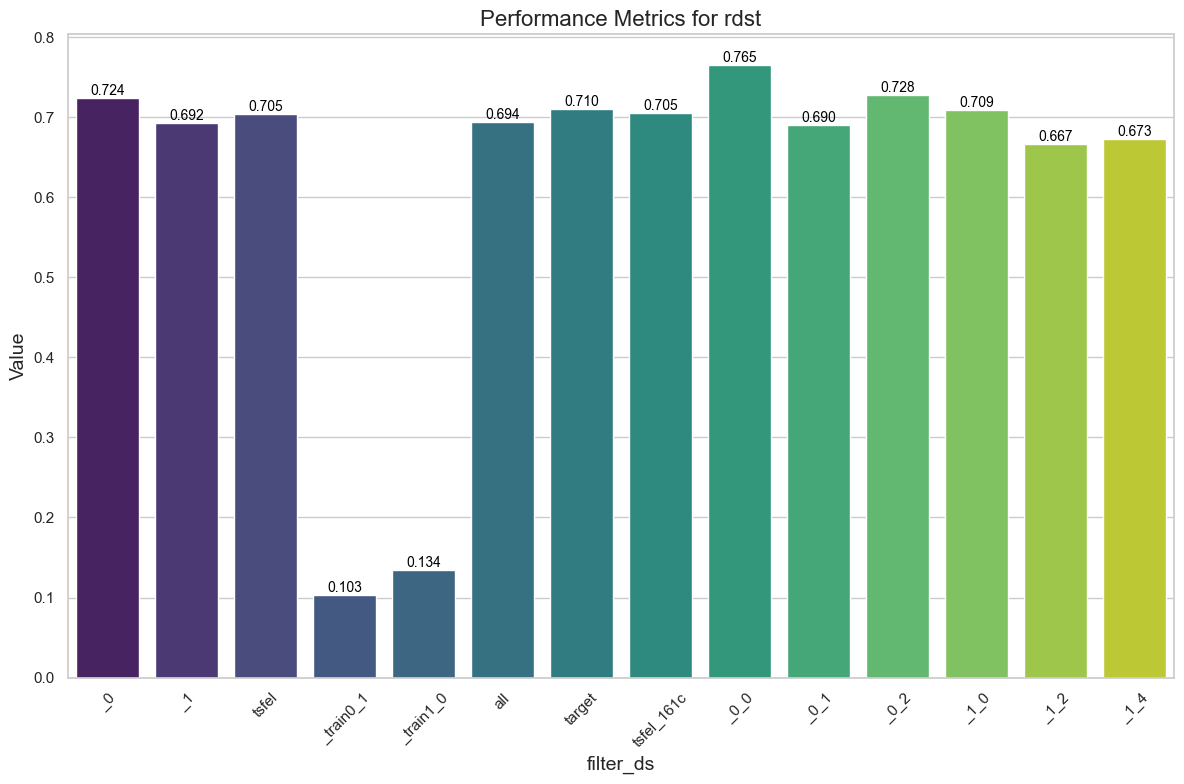

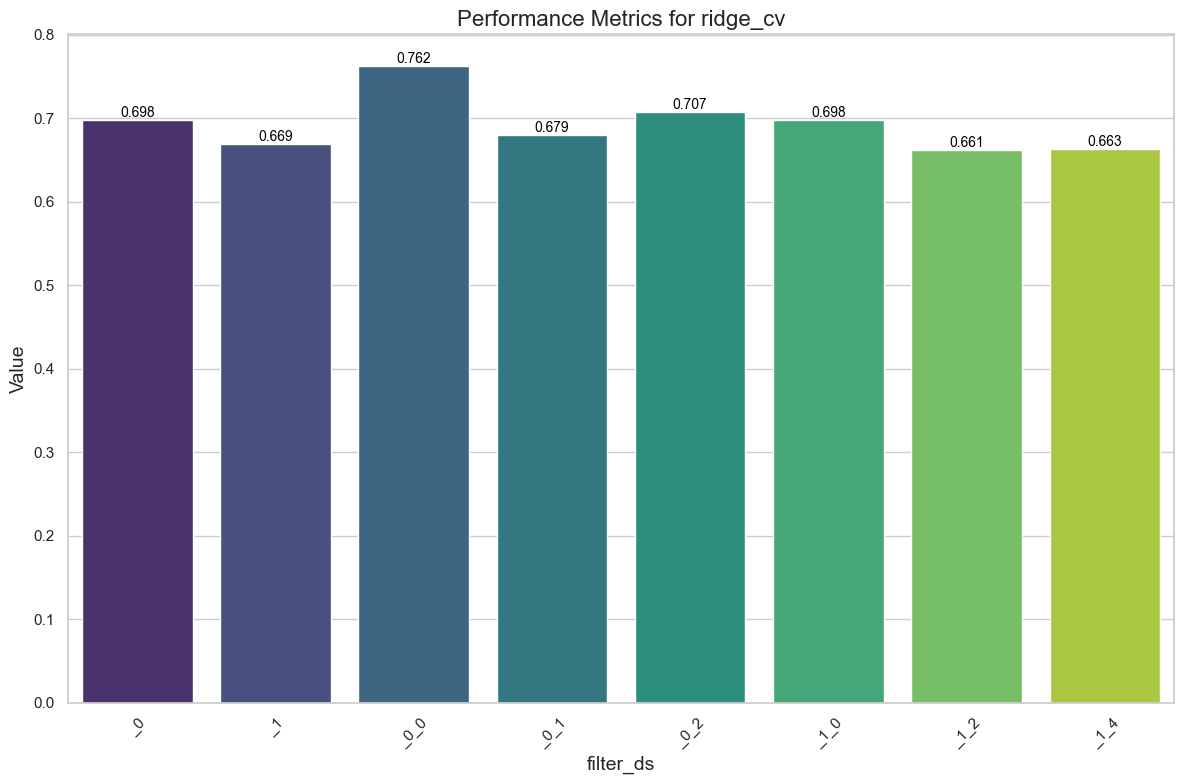

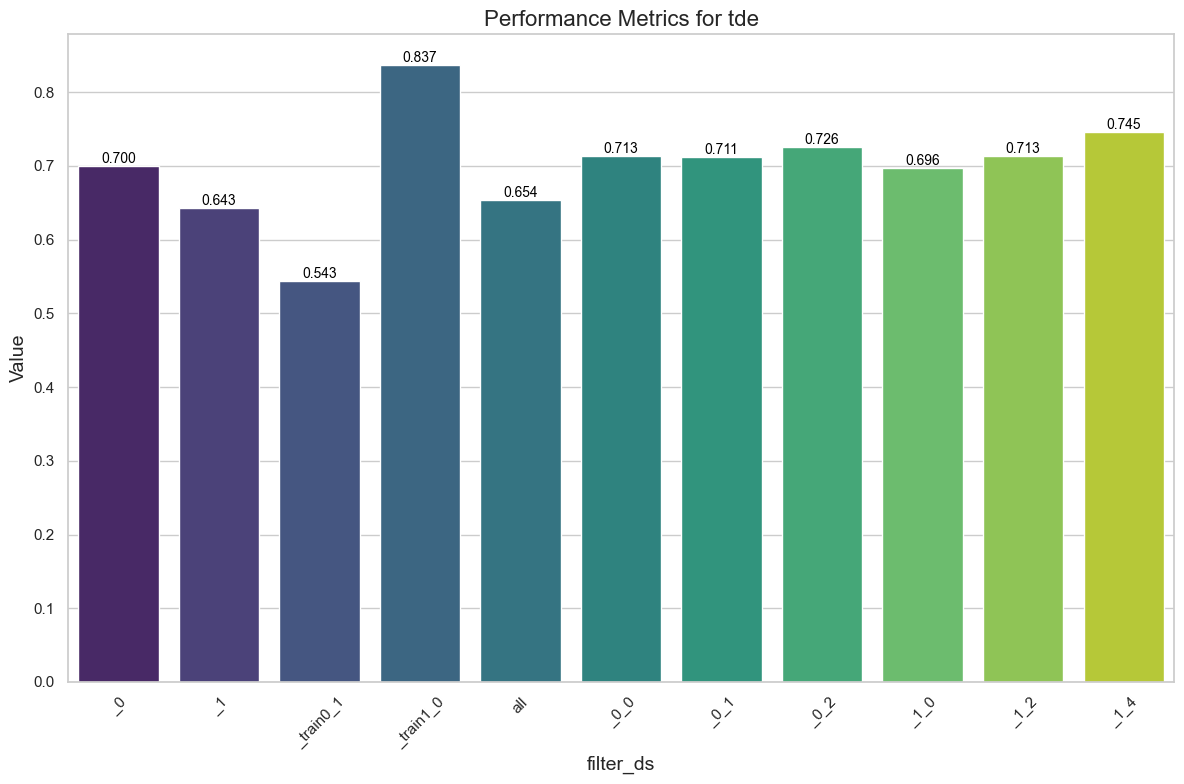

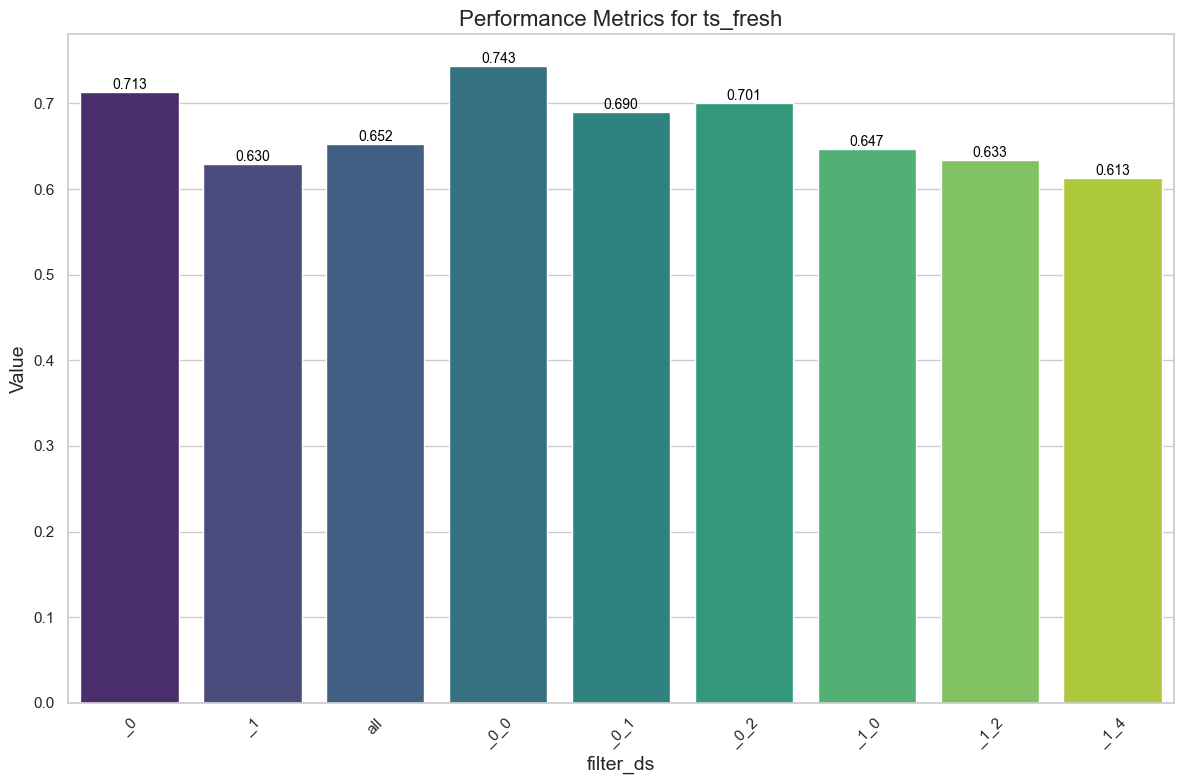

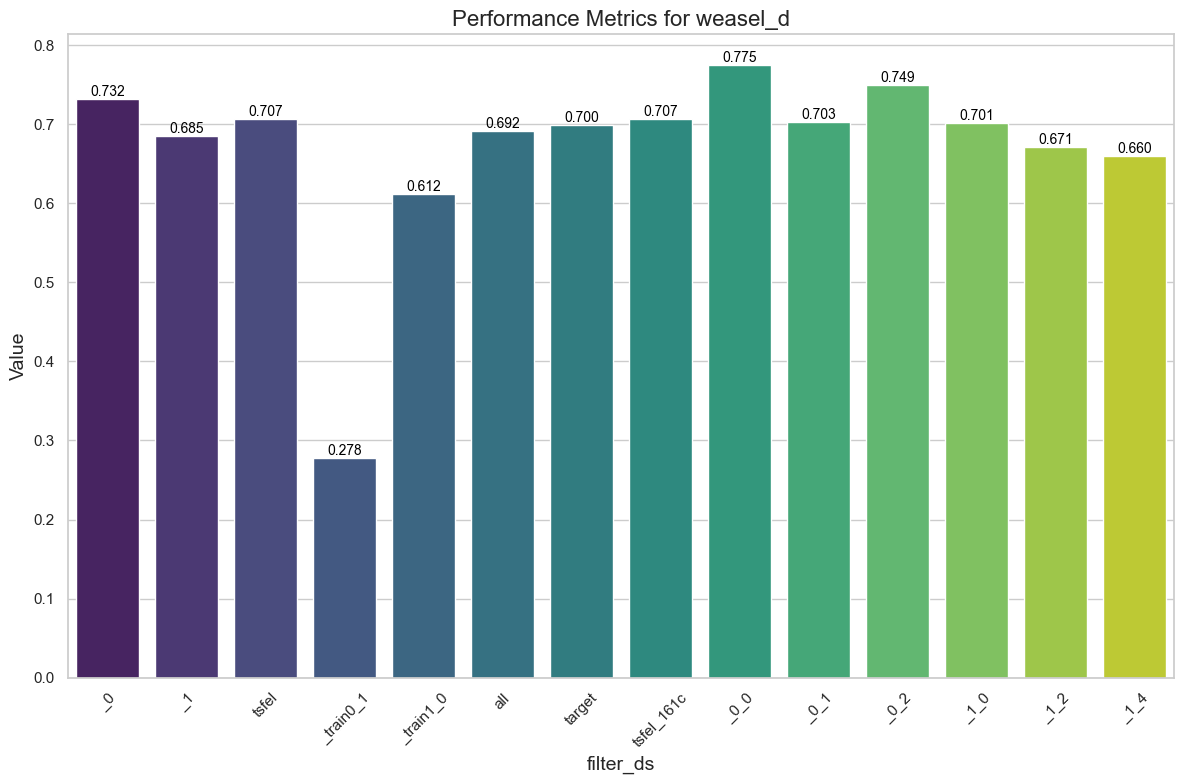

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/carolina/Desktop/Mestrado/combined_entries_all_files.csv')

# metrics = ['accuracy_score_mean', 'f1_score_mean', 'precision_score_mean', 'recall_score_mean']
metrics = [ 'f1_score_mean']

for classifier, group_data in data.groupby('Classifier'):
    plt.figure(figsize=(12, 8))
    
    melted = group_data.melt(id_vars=['filter_ds'], 
                             value_vars=metrics, 
                             var_name='Metric', 
                             value_name='Value')
    
    ax = sns.barplot(data=melted, x='filter_ds', y='Value', hue='filter_ds', palette='viridis')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10, color='black')
    
    plt.title(f'Performance Metrics for {classifier}', fontsize=16)
    plt.xlabel('filter_ds', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(rotation=45)
    
    # plt.legend(title='Filter', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
    
    plt.tight_layout()
    plt.show()


1. Como a separação dos dados por cidade afeta a precisão do classificador?
  A separação dos dados por cidade pode aumentar a precisão se as características de cada cidade forem muito distintas. No entanto, pode diminuir a performance se as diferenças entre as cidades forem pequenas, pois o classificador pode não aprender a generalizar bem para outras cidades.

2. O que acontece ao treinar o classificador sem a separação dos dados por cidade ou país?
  O desempenho sem separação (completo) pode ser mais equilibrado, pois o modelo pode aprender a partir de uma base de dados mais ampla. Contudo, isso pode resultar em overfitting ou underfitting dependendo das variabilidades presentes nos dados de diferentes cidades ou países.

3. Como a adição das colunas de cidade e país impacta a performance do modelo?
  A adição de informações sobre cidade e país pode melhorar o desempenho se houver padrões específicos de comportamento de visitantes que variam de acordo com esses fatores. No entanto, o modelo pode não ser capaz de aproveitar essas informações de maneira eficaz se os padrões de visitação forem mais homogêneos.

4. A troca de países para teste e treinamento afeta a performance do modelo?
  A troca de países entre treinamento e teste pode resultar em uma redução de desempenho, especialmente se os comportamentos de visitação entre países forem muito diferentes. Isso exige que o modelo generalize melhor, mas também pode levar a uma maior taxa de erro se o modelo não for robusto o suficiente.

5. Como a inclusão de muitas informações extraídas pelo tsfel afeta o desempenho dos classificadores?
  A adição de informações geradas pelo tsfel (Time Series Feature Extraction Library) pode aumentar a precisão do modelo se as características extraídas forem relevantes e úteis para a tarefa de classificação. Porém, pode também causar sobrecarga de informações irrelevantes, prejudicando o desempenho (overfitting), especialmente se o número de características for muito grande em relação ao número de exemplos.

6. Qual é a diferença de desempenho entre os diferentes classificadores utilizados?
  Dependendo do classificador, pode haver uma variação significativa no desempenho. Classificadores como Random Forest e SVM podem ser mais eficazes em capturar relações complexas nos dados, enquanto algoritmos como KNN podem ser mais sensíveis a distúrbios nos dados. A escolha do classificador é crucial dependendo da complexidade dos dados e do modelo.

7. Qual cenário produziu o melhor equilíbrio entre F1-score, precisão e recall?
  O melhor equilíbrio pode variar de acordo com o tipo de dados e a estratégia de classificação. O F1-score, que é uma média harmônica entre precisão e recall, tende a ser uma boa métrica para cenários desbalanceados. A separação dos dados por cidade pode melhorar o F1-score, enquanto a generalização (dados completos) pode melhorar a precisão.

8. Em quais cenários o modelo teve maior taxa de overfitting ou underfitting?
  Cenários em que você usou muitos dados de uma única cidade ou país podem causar overfitting, pois o modelo pode ter aprendido padrões específicos demais. Por outro lado, a ausência de separação pode causar underfitting se o modelo não conseguir capturar as diferenças locais importantes.

9. Qual foi o impacto das features temporais adicionais na performance do classificador?
  As features temporais podem melhorar a performance se as variações ao longo do tempo forem um fator importante para a classificação. Porém, se as features forem muito ruidosas ou irrelevantes, isso pode reduzir a precisão do modelo devido ao overfitting.

10. Existem padrões de desempenho distintos dependendo das cidades ou países analisados?
  Sim, pode haver variações de desempenho baseadas em diferenças culturais, comportamentais e sazonais entre as cidades ou países. Isso pode ser observado em métricas como recall, onde certos classificadores podem se sair melhor em países ou cidades específicas.

In [49]:
import pandas as pd

def combine_datasets_and_calculate_average(file1, file2, id_column, new_column, output_combined, output_averages):
    dataset1 = pd.read_csv(file1)
    dataset2 = pd.read_csv(file2)

    dataset1.columns = dataset1.columns.str.strip()
    dataset2.columns = dataset2.columns.str.strip()

    combined_dataset = pd.merge(dataset1, dataset2[[id_column, new_column]], on=id_column, how='left')

    combined_dataset.to_csv(output_combined, index=False)
    print(f"Combined dataset saved to {output_combined}")

    h_columns = [col for col in combined_dataset.columns if col.startswith('h') and col[1:].isdigit()]
    averages = combined_dataset.groupby(new_column)[h_columns].mean()

    averages.to_csv(output_averages)
    print(f"Averages saved to {output_averages}")

combine_datasets_and_calculate_average(
    file1='/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv',
    file2='/Users/carolina/Desktop/Mestrado/classifiers/df_timeseries_with_kmeans_k10_clusters.csv',
    id_column='id',
    new_column='kmeans_cluster_k10',
    output_combined='combined_carolina_k10.csv',
    output_averages='averages_signatures_carolina_k10.csv'
)


Combined dataset saved to combined_carolina_k10.csv
Averages saved to averages_signatures_carolina_k10.csv


In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def combine_datasets_and_evaluate(file1, file2, id_column, new_column, output_combined, output_averages):
    dataset1 = pd.read_csv(file1)
    dataset2 = pd.read_csv(file2)

    dataset1.columns = dataset1.columns.str.strip()
    dataset2.columns = dataset2.columns.str.strip()

    combined_dataset = pd.merge(dataset1, dataset2[[id_column, new_column]], on=id_column, how='left')

    combined_dataset.to_csv(output_combined, index=False)
    print(f"Combined dataset saved to {output_combined}")

    h_columns = [col for col in combined_dataset.columns if col.startswith('h') and col[1:].isdigit()]
    averages = combined_dataset.groupby(new_column)[h_columns].mean()

    averages.to_csv(output_averages)
    print(f"Averages saved to {output_averages}")

    threshold = 0.5
    group_predictions = averages.applymap(lambda x: 1 if x >= threshold else 0)

    predictions_mapped = combined_dataset[new_column].map(group_predictions.mean(axis=1).round())

    true_labels = combined_dataset[new_column]

    accuracy = accuracy_score(true_labels, predictions_mapped)
    f1 = f1_score(true_labels, predictions_mapped, average='weighted')
    precision = precision_score(true_labels, predictions_mapped, average='weighted')
    recall = recall_score(true_labels, predictions_mapped, average='weighted')

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
combine_datasets_and_evaluate(
    file1='/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv',
    file2='/Users/carolina/Desktop/Mestrado/classifiers/df_timeseries_with_kmeans_k5_clusters.csv',
    id_column='id',
    new_column='kmeans_cluster_k5',
    output_combined='combined_carolina_k5.csv',
    output_averages='averages_signatures_carolina_k5.csv'
)


Combined dataset saved to combined_carolina_k5.csv
Averages saved to averages_signatures_carolina_k5.csv

Evaluation Metrics:
Accuracy: 0.6110
F1-Score: 0.4645
Precision: 0.3746
Recall: 0.6110


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying to improve the f1-score result:

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def combine_datasets_and_evaluate(file1, file2, id_column, new_column, output_combined, output_averages):
    # Load datasets
    dataset1 = pd.read_csv(file1)
    dataset2 = pd.read_csv(file2)

    # Clean column names
    dataset1.columns = dataset1.columns.str.strip()
    dataset2.columns = dataset2.columns.str.strip()

    # Merge datasets
    combined_dataset = pd.merge(dataset1, dataset2[[id_column, new_column]], on=id_column, how='left')

    # Save combined dataset
    # combined_dataset.to_csv(output_combined, index=False)
    # print(f"Combined dataset saved to {output_combined}")

    # Select relevant columns
    h_columns = [col for col in combined_dataset.columns if col.startswith('h') and col[1:].isdigit()]

    # Normalize the features
    # scaler = StandardScaler()
    # combined_dataset[h_columns] = scaler.fit_transform(combined_dataset[h_columns])

    # Calculate averages by cluster
    # averages = combined_dataset.groupby(new_column)[h_columns].mean()
    # averages.to_csv(output_averages)
    # print(f"Averages saved to {output_averages}")

    # Prepare data for supervised learning
    X = combined_dataset[h_columns]
    y = combined_dataset[new_column]
    # print(f"Valores de X: {X}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Valores de y_train: {X_train}")
    # print(f"Valores de y_train: {y_train}")
    # print(f"Valores de y_test: {y_test}")

    # Train a classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Call the function with file paths
combine_datasets_and_evaluate(
    file1='/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv',
    file2='/Users/carolina/Desktop/Mestrado/classifiers/df_timeseries_with_kmeans_k5_clusters.csv',
    id_column='id',
    new_column='kmeans_cluster_k5',
    output_combined='combined_carolina_k5_2.csv',
    output_averages='averages_signatures_carolina_k5_2.csv'
)

Valores de y_train:             h00       h01       h02       h03  h04       h05       h06  \
7854   0.474604  0.212029  0.254435  0.221431  0.0  0.000000  0.000000   
3800   0.048148  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
9367   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.032199   
3805   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
11673  0.000000  0.000000  0.000000  0.000000  0.0  0.002222  0.059855   
...         ...       ...       ...       ...  ...       ...       ...   
8043   0.741459  0.600952  0.404195  0.227232  0.0  0.000000  0.000000   
9406   0.314286  0.034667  0.000000  0.000000  0.0  0.000000  0.000000   
6499   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
8652   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.016340   
1385   0.324417  0.227212  0.000000  0.000000  0.0  0.000000  0.000000   

            h07       h08       h09  ...       h14       h15       h16  \
7854   0.000000  

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explicação do código anterior

### Importações

```python
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
```

1. **`pandas`**: Usado para manipulação e análise de dados.
2. **`sklearn.metrics`**: Importa métricas de avaliação (accuracy, F1-score, precisão e recall).
3. **`StandardScaler`**: Normaliza os dados, ajustando a média para 0 e o desvio padrão para 1.
4. **`train_test_split`**: Divide os dados em conjuntos de treino e teste.
5. **`RandomForestClassifier`**: Implementa o classificador Random Forest, baseado em árvores de decisão.
6. **`numpy`**: Biblioteca para cálculos numéricos.

---

### Função `combine_datasets_and_evaluate`

#### Carregando os Dados
```python
dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
```
- **`pd.read_csv`**: Lê os arquivos CSV especificados pelos caminhos `file1` e `file2` e os armazena em `dataset1` e `dataset2`.

#### Limpando os Nomes das Colunas
```python
dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()
```
- Remove espaços extras nos nomes das colunas para evitar problemas ao manipulá-las.

#### Mesclando os Datasets
```python
combined_dataset = pd.merge(dataset1, dataset2[[id_column, new_column]], on=id_column, how='left')
```
- **`pd.merge`**: Combina `dataset1` e uma seleção de colunas de `dataset2` (apenas `id_column` e `new_column`) com base na coluna `id_column`. 
- **`how='left'`**: Garante que todos os registros de `dataset1` estejam no resultado, adicionando os valores correspondentes de `dataset2`.

---

#### Selecionando Colunas Relevantes
```python
h_columns = [col for col in combined_dataset.columns if col.startswith('h') and col[1:].isdigit()]
```
- Identifica colunas cujos nomes começam com "h" seguidos por números (e.g., `h1`, `h2`). Essas colunas representam recursos relevantes.

---

#### Normalização (Comentada)
```python
# scaler = StandardScaler()
# combined_dataset[h_columns] = scaler.fit_transform(combined_dataset[h_columns])
```
- **`StandardScaler`**: Normalizaria os valores de `h_columns`, mas essa parte está comentada. Caso ativo, ajustaria os dados para terem média 0 e desvio padrão 1.

---

#### Separando Recursos e Rótulos
```python
X = combined_dataset[h_columns]
y = combined_dataset[new_column]
```
- **`X`**: Matriz de recursos, contendo as colunas selecionadas em `h_columns`.
- **`y`**: Vetor de rótulos alvo, representando os valores da coluna `new_column`.

---

#### Divisão em Treino e Teste
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```
- Divide os dados em conjuntos de treino e teste:
  - **80% treino** (`X_train`, `y_train`) e **20% teste** (`X_test`, `y_test`).
  - **`random_state=42`**: Garante reprodutibilidade.
  - **`stratify=y`**: Mantém a proporção de classes do conjunto original nos conjuntos de treino e teste.

---

#### Treinando o Classificador
```python
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
```
- **`RandomForestClassifier`**:
  - **`n_estimators=100`**: Utiliza 100 árvores na floresta.
  - **`random_state=42`**: Garante reprodutibilidade.
  - **`class_weight='balanced'`**: Ajusta o peso das classes para lidar com desbalanceamento.
- **`fit`**: Treina o classificador com os dados de treino (`X_train` e `y_train`).

---

#### Realizando Previsões
```python
y_pred = clf.predict(X_test)
```
- **`predict`**: Usa o modelo treinado para prever os rótulos do conjunto de teste (`X_test`).

---

#### Avaliando o Modelo
```python
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
```
- Calcula métricas de avaliação:
  - **`accuracy_score`**: Proporção de previsões corretas.
  - **`f1_score`**: Média harmônica entre precisão e recall, considerando o balanceamento entre as classes.
  - **`precision_score`**: Taxa de previsões positivas corretas.
  - **`recall_score`**: Proporção de exemplos positivos identificados corretamente.

---

#### Exibindo os Resultados
```python
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
```
- Exibe as métricas calculadas no terminal, formatadas com quatro casas decimais.

---

#### Chamando a Função
```python
combine_datasets_and_evaluate(
    file1='/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_timeseries.csv',
    file2='/Users/carolina/Desktop/Mestrado/classifiers/df_timeseries_with_kmeans_k5_clusters.csv',
    id_column='id',
    new_column='kmeans_cluster_k5',
    output_combined='combined_carolina_k5_2.csv',
    output_averages='averages_signatures_carolina_k5_2.csv'
)
```
- Executa a função com os seguintes argumentos:
  - **`file1`** e **`file2`**: Caminhos para os arquivos CSV a serem combinados.
  - **`id_column`**: Nome da coluna comum nos dois datasets para fazer o merge.
  - **`new_column`**: Nome da coluna alvo do dataset 2 a ser combinada.
  - **`output_combined`**: Nome do arquivo para salvar o dataset combinado (comentado no código).
  - **`output_averages`**: Nome do arquivo para salvar as médias agrupadas (também comentado).

This code is a complex script designed for creating and evaluating machine learning tasks for time series classifiers using multiple filters such as country, city, and category. Below is a detailed explanation of the main parts of the script:

---

### **1. Environment Setup**

```python
import pandas as pd
import numpy as np
import scipy.stats as stats
from clearml import Task
import torch
```

- **Libraries**:
  - `pandas`: For data manipulation and reading CSV files.
  - `numpy`: For numerical operations like mean and standard deviation.
  - `scipy.stats`: For statistical calculations, including confidence intervals.
  - `clearml`: For task management and logging.
  - `torch`: For GPU and tensor operations, indicating potential integration with deep learning models.

---

### **2. GPU Availability Check**

```python
if torch.cuda.is_available():
    print("GPU is available")
    device = torch.device("cuda")
else:
    print("GPU is not available")
    device = torch.device("cpu")
```

- Checks if a GPU is available and assigns the device (`cuda` or `cpu`) for computation.

---

### **3. Main Function: `create_tasks`**

```python
def create_tasks(K, country=None, city=None, category=None):
```

- **Inputs**:
  - `K`: Number of folds for K-fold cross-validation.
  - `country`, `city`, `category`: Filters for dataset segmentation.

- **Filter String**:
  ```python
  filter_str = ''
  if country is not None:
      filter_str = filter_str + f'_{country}'
  if city is not None:
      filter_str = filter_str + f'_{city}'
  if category is not None:
      filter_str = filter_str + f'_{category}'
  ```

  - Creates a string based on the selected filters to uniquely name tasks.

- **Iterate Over Classifiers**:
  ```python
  for queue, classifier in classifiers:
  ```

  - `classifiers`: List of tuples containing queue types (`light`/`heavy`) and their respective classifier functions.
  - Each classifier is trained using K-fold cross-validation.

- **Create Node Tasks**:
  ```python
  node_name = f'{classifier}{filter_str}_f{k+1}-{K}'
  results = classifier(task_name=node_name, clearML=False, params={...})
  ```

  - Creates unique task names for each fold.
  - Calls the classifier with task-specific parameters.

- **Aggregate Metrics**:
  ```python
  metrics =  ['accuracy_score','f1_score','precision_score','recall_score']
  means = []

  for metric in metrics:
      values = [results[metric] for results in kfold_results]
      metric_mean = np.mean(values)
      metric_std = np.std(values)
      trust_interval = stats.t.interval(0.95, K - 1, loc=metric_mean, scale=metric_std)
      print('          ', metric, f'mean={metric_mean:.7f}', f'std={metric_std:.7f}', f't_interval={trust_interval}')
  ```

  - Calculates mean, standard deviation, and confidence intervals for performance metrics across K folds.

---

### **4. Classifier List**

```python
classifiers = [
    ['light', run_MrSQM],
    # Other classifiers can be added here.
]
```

- Specifies which classifiers to run. For example, the `run_MrSQM` function handles the `MrSQM` classifier.

---

### **5. Dataset Preparation**

```python
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')
unique_categories = df[['country', 'city', 'category']].drop_duplicates()
unique_cities = unique_categories[['country', 'city']].drop_duplicates()
unique_countries = unique_cities[['country']].drop_duplicates()
```

- Reads the dataset and extracts unique combinations of country, city, and category for filtering.

---

### **6. Training Loop**

```python
filters_means = []

for country, city in unique_cities:
    means = create_tasks(K, country, city)
    filters_means.append(means)

create_tasks(K)  # Train on the full dataset.
```

- Trains classifiers for:
  - Each city (`unique_cities` loop).
  - Full dataset (last `create_tasks` call).

---

### **7. Aggregating Results**

```python
metrics =  ['accuracy_score','f1_score','precision_score','recall_score']

for m, metric in enumerate(metrics):
    mean_of_means = np.mean([filter_means[m] for filter_means in filters_means])
    print(f'Classifier mean {metric}={mean_of_means:.7f}')
```

- Computes the average performance of all classifiers across all filters for each metric.

---

### **8. Timing and Logging**

```python
date_time_init = datetime.now()
print('Start time:', date_time_init.strftime('%Y-%d-%m_%H-%M-%S'))

# ...

date_time_finish = datetime.now()
print('End time:', date_time_finish.strftime('%Y-%d-%m_%H-%M-%S'))

running_time = date_time_finish - date_time_init
print('Running time:', str(running_time))
```

- Records the start and end times and calculates the total runtime.

---

### **Key Features**
1. **K-Fold Cross-Validation**:
   - Ensures robust performance evaluation.
   - Aggregates results across folds.

2. **Custom Filtering**:
   - Enables segmentation of data by country, city, or category.

3. **Extensibility**:
   - Easy to add or remove classifiers.

4. **Statistical Analysis**:
   - Provides confidence intervals for performance metrics.

---

### **Potential Enhancements**
1. Automate selection of classifiers and filters to streamline the process.
2. Integrate parallel processing for faster execution of multiple tasks.
3. Improve logging with ClearML for real-time monitoring.

In [2]:
import pandas as pd

In [3]:
pd.read_csv('mean_by_classifier_city.csv')

filename  accuracy_score_mean  f1_score_mean  \
0                    tde             0.715596       0.717687   
1               weasel_d             0.717989       0.710005   
2                   rdst             0.712793       0.705120   
3                  hydra             0.713404       0.704776   
4               ridge_cv             0.706609       0.695062   
5                  rSTSF             0.693498       0.690600   
6   best_of_m1_m2_models             0.700000       0.690000   
7            multirocket             0.691672       0.689669   
8             hivecotev2             0.696009       0.687545   
9               ts_fresh             0.673231       0.671237   
10                 MrSQM             0.658763       0.658351   
11                 DrCIF             0.656923       0.655052   
12      elastic_ensemble             0.641329       0.641038   
13          fresh_prince             0.542483       0.541251   
14        inception_time             0.252565       0.164487   

    precision_score_mean  recall_score_mean  accuracy_score_std  f1_score_std  \
0               0.731809           0.715596            0.029448      0.031425   
1               0.716303           0.717989            0.024021      0.025202   
2               0.708532           0.712793            0.017487      0.017987   
3               0.710532           0.713404            0.023285      0.024859   
4               0.702038           0.706609            0.019388      0.020966   
5               0.692732           0.693498            0.020040      0.020533   
6               0.660000           0.760000            0.000000      0.000000   
7               0.694698           0.691672            0.025280      0.026584   
8               0.692076           0.696009            0.020405      0.021846   
9               0.673683           0.673231            0.023188      0.022789   
10              0.660917           0.658763            0.021194      0.021092   
11              0.657696           0.656923            0.017398      0.017276   
12              0.648081           0.641329            0.021098      0.020090   
13              0.543137           0.542483            0.020653      0.020776   
14              0.350196           0.252565            0.096230      0.088518   

    precision_score_std  recall_score_std  accuracy_score_ci_l  f1_score_ci_l  \
0              0.032404          0.029448             0.633836       0.630436   
1              0.026200          0.024021             0.651294       0.640032   
2              0.017592          0.017487             0.664241       0.655180   
3              0.025063          0.023285             0.648755       0.635755   
4              0.017474          0.019388             0.652778       0.636852   
5              0.020631          0.020040             0.637858       0.633590   
6              0.000000          0.000000             0.000000       0.000000   
7              0.024351          0.025280             0.621482       0.615859   
8              0.021134          0.020405             0.639354       0.626889   
9              0.022553          0.023188             0.608852       0.607965   
10             0.020972          0.021194             0.599919       0.599791   
11             0.017459          0.017398             0.608618       0.607086   
12             0.021250          0.021098             0.582752       0.585260   
13             0.021225          0.020653             0.485143       0.483567   
14             0.160678          0.096230             0.103290       0.081359   

    precision_score_ci_l  recall_score_ci_l  accuracy_score_ci_h  \
0               0.641843           0.633836             0.797356   
1               0.643560           0.651294             0.784683   
2               0.659687           0.664241             0.761344   
3               0.640945           0.648755             0.778052   
4               0.653521           0.652778             0

In [9]:
# Specify the columns you want to include
columns_to_include = ['filename', 'accuracy_score_mean', 'f1_score_mean','precision_score_mean', 'recall_score_mean']

# Read only those columns from the CSV
df = pd.read_csv('mean_by_classifier_city.csv', usecols=columns_to_include)

print(df)


                filename  accuracy_score_mean  f1_score_mean  \
0                    tde             0.715596       0.717687   
1               weasel_d             0.717989       0.710005   
2                   rdst             0.712793       0.705120   
3                  hydra             0.713404       0.704776   
4               ridge_cv             0.706609       0.695062   
5                  rSTSF             0.693498       0.690600   
6   best_of_m1_m2_models             0.700000       0.690000   
7            multirocket             0.691672       0.689669   
8             hivecotev2             0.696009       0.687545   
9               ts_fresh             0.673231       0.671237   
10                 MrSQM             0.658763       0.658351   
11                 DrCIF             0.656923       0.655052   
12      elastic_ensemble             0.641329       0.641038   
13          fresh_prince             0.542483       0.541251   
14        inception_time             0.2

In [67]:
import os
import csv

# Mapping for cities, countries, and categories
city_mapping = {
    'curitiba': (0, 0),
    'rio de janeiro': (0, 1),
    'sao paulo': (0, 2),
    'chicago': (1, 0),
    'new york': (1, 2),
    'san francisco': (1, 4),
}

category_mapping = {
    'bakeries': 0,
    'bars': 1,
    'coffee': 2,
    'dance clubs': 3,
    'restaurants': 4,
}

# Function to generate CSV from .txt files
def generate_csv(data_folder, output_filename, time_period):
    rows = []
    id_counter = 0

    # Loop through each country folder (br and us)
    for country_folder in os.listdir(data_folder):
        country_path = os.path.join(data_folder, country_folder)
        if not os.path.isdir(country_path):
            continue
        
        # Loop through each city folder inside the country folder
        for city_folder in os.listdir(country_path):
            city_path = os.path.join(country_path, city_folder)
            if not os.path.isdir(city_path) or city_folder not in city_mapping:
                continue
            country, city = city_mapping[city_folder]
    
            # Loop through each category folder
            for category_folder in os.listdir(city_path):
                category_path = os.path.join(city_path, category_folder)
                if not os.path.isdir(category_path) or category_folder not in category_mapping:
                    continue
                category = category_mapping[category_folder]
    
                # Process the .txt files
                for filename in os.listdir(category_path):
                    if time_period not in filename:
                        continue
                    
                    # Read data from the .txt file
                    file_path = os.path.join(category_path, filename)
                    print(f"Processing file: {file_path}")  # Debug message
                    with open(file_path, 'r') as file:
                        for line in file:
                            values = line.strip().split(',')
                            row = [id_counter] + values + [country, city, category]
                            rows.append(row)
                            id_counter += 1

    # Write data to CSV
    with open(output_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['id', 'h00', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'country', 'city', 'category'])
        writer.writerows(rows)

    print(f"CSV file '{output_filename}' has been generated!")

# Define the data folder
data_folder = '/Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes'

# Generate CSV for weekdays and weekends
generate_csv(data_folder, 'weekdays_data.csv', 'weekdays')
generate_csv(data_folder, 'weekends_data.csv', 'weekends')

Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays208.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays234.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays552.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays546.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays220.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays591.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/weekdays585.txt
Processing file: /Users/carolina/Desktop/Mestrado/Lendut-poptimes-6f47251548c4/poptimes/us/chicago/restaurants/